In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import pandas as pd

plt.rc('axes', axisbelow=True)

%matplotlib inline

In [2]:
all_distance_function_names = ['Jaccard','Hamming','HammingIpsenMikhailov','Frobenius',
                               'PolynomialDissimilarity','DegreeDivergence','PortraitDivergence',
                               'QuantumJSD','CommunicabilityJSD','GraphDiffusion','ResistancePerturbation',
                               'NetLSD','LaplacianSpectralGJS','LaplacianSpectralEUL','IpsenMikhailov',
                               'NonBacktrackingSpectral','DistributionalNBD','DMeasure','DeltaCon','NetSimile']

better_names = ["Jaccard dissimilarity\n[JAC]",
                "Hamming distance\n[HAM]",
                "Hamming-Ipsen-Mikhailov\n[HIM]",
                "Frobenius norm\n[FRO]",
                "Polynomial dissimilarity\n[POD]",
                "Degree distribution\nJensen-Shannon div. [DJS]",
                "Portrait divergence\n[POR]",
                "Quantum density matrix\nJensen-Shannon div. [QJS]",
                "Communicability sequence\nentropy [CSE]",
                "Graph diffusion distance\n[GDD]",
                "Resistance perturbation\ndistance [REP]",
                "NetLSD\n[LSD]",
                "Laplacian (Gaussian kernel)\nJensen-Shannon div. [LGJ]",
                "Laplacian (Lorenzian kernel)\nEuclidean distance [LLE]",
                "Ipsen-Mikhailov\n[IPM]",
                "Nonbacktracking spectral\ndistance [NBD]",
                "Distribributional nonbactracking\nspectral distance [DNB]",
                "D-measure distance\n[DMD]",                
                "DeltaCon\n[DCN]",
                "NetSimile\n[NES]"
               ]
title_dict = dict(zip(all_distance_function_names, better_names))

# gnp and rgg

In [3]:
dir_name_no = '../data/wegd_gnp_rgg_vary_p.csv'
wegdf = pd.read_csv(dir_name_no)
param_label = wegdf.param_label.unique()[0]
n = wegdf.n.unique()[0]

print(wegdf.shape)
wegdf.head()

(2034, 9)


ensemble    n    k param_label  param_value      distance_label  d_mean  \
0      gnp  500  0.0           p          0.0  CommunicabilityJSD     0.0   
1      gnp  500  0.0           p          0.0            DMeasure     0.0   
2      gnp  500  0.0           p          0.0    DegreeDivergence     0.0   
3      gnp  500  0.0           p          0.0            DeltaCon     0.0   
4      gnp  500  0.0           p          0.0   DistributionalNBD     0.0   

    d_n  d_stdv  
0  1000     0.0  
1  1000     0.0  
2  1000     0.0  
3  1000     0.0  
4  1000     0.0

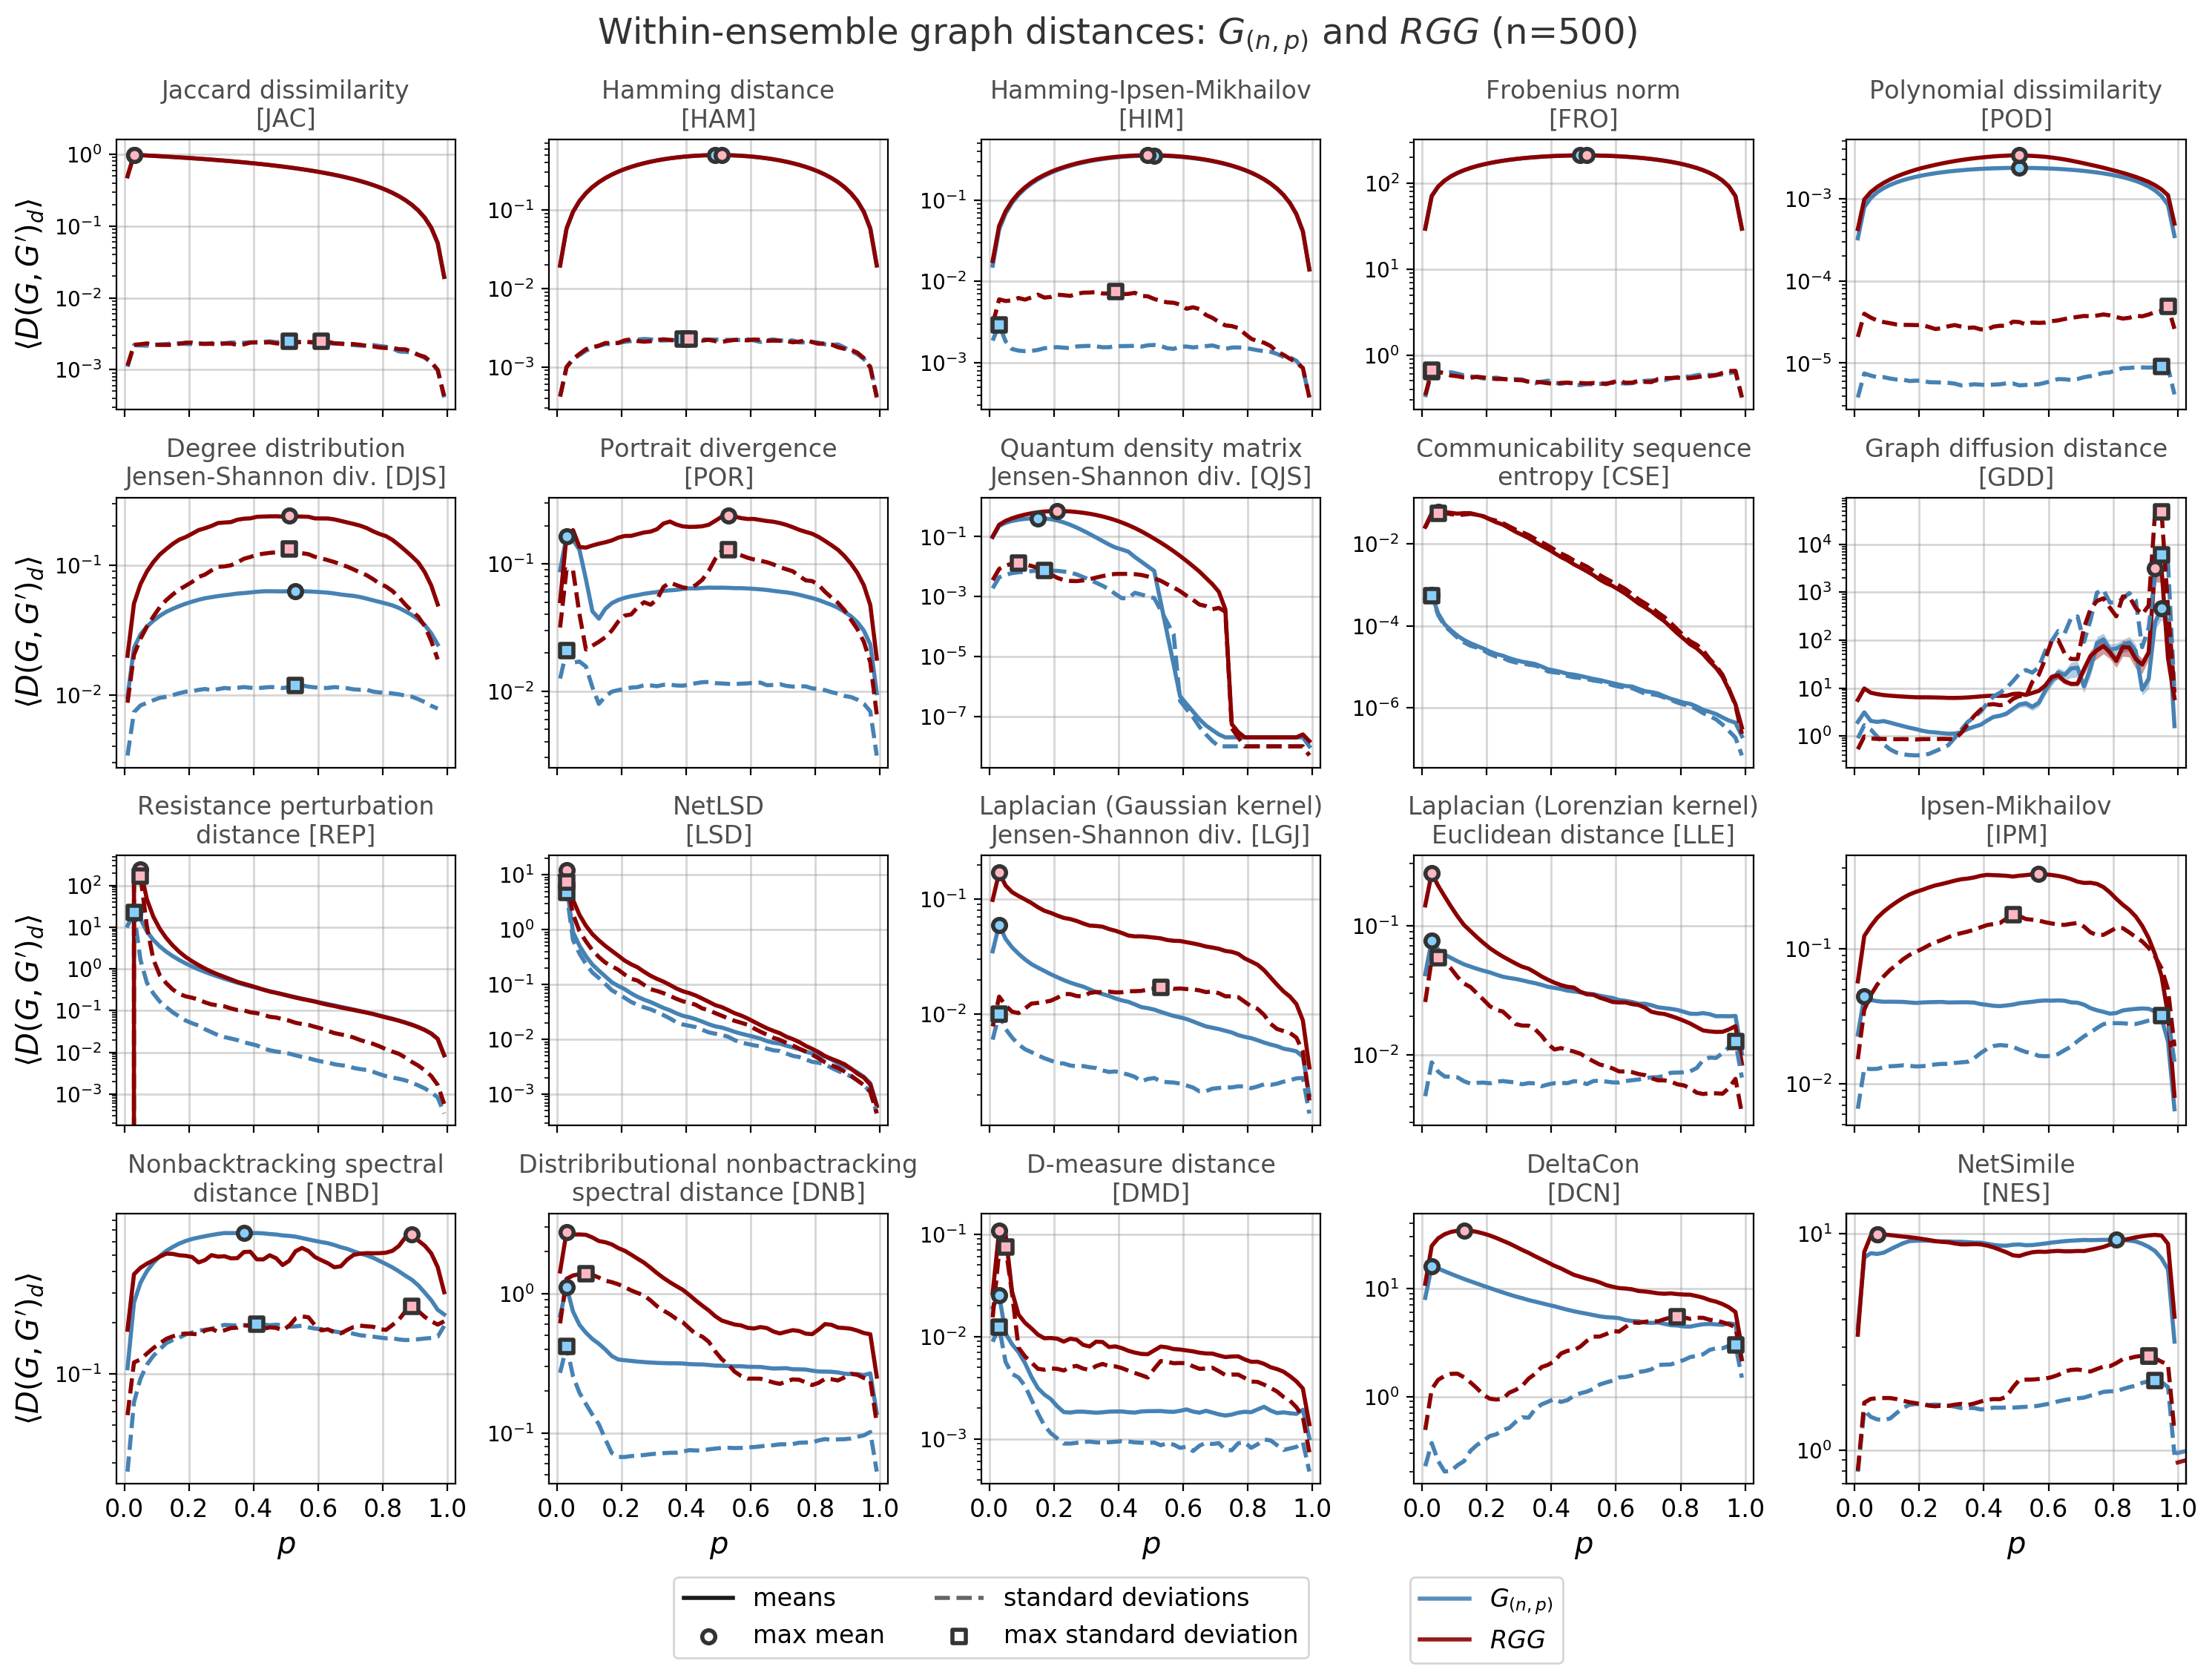

In [4]:
ncols = 5; nrows = 4
w = 3.6; h = 3.0
gnp_col = 'steelblue'; gnp_col_l = 'lightskyblue'
rgg_col = 'darkred'; rgg_col_l = 'lightpink'

tups = list(it.product(range(nrows), range(ncols)))
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=200, sharex=True)
plt.subplots_adjust(wspace=0.275,hspace=0.325)
wid = 2

for ai, tup in enumerate(tups):
    d_lab = all_distance_function_names[ai]
    df_i_gnp = wegdf.loc[(wegdf['distance_label']==d_lab)&(wegdf['ensemble']=='gnp')].copy()
    df_i_rgg = wegdf.loc[(wegdf['distance_label']==d_lab)&(wegdf['ensemble']=='rgg')].copy()

    xvals_i_gnp = df_i_gnp['param_value'].rolling(window=wid).mean().values
    xvals_i_rgg = df_i_rgg['param_value'].rolling(window=wid).mean().values

    means_i_gnp = df_i_gnp['d_mean'].rolling(window=wid).mean().values
    means_i_rgg = df_i_rgg['d_mean'].rolling(window=wid).mean().values

    stdvs_i_gnp = df_i_gnp['d_stdv'].rolling(window=wid).mean().values
    stdvs_i_rgg = df_i_rgg['d_stdv'].rolling(window=wid).mean().values

    max_i_mean_gnp = xvals_i_gnp[np.argmax(np.nan_to_num(means_i_gnp))]
    max_i_mean_rgg = xvals_i_rgg[np.argmax(np.nan_to_num(means_i_rgg))]
    max_i_stdv_gnp = xvals_i_gnp[np.argmax(np.nan_to_num(stdvs_i_gnp))]
    max_i_stdv_rgg = xvals_i_rgg[np.argmax(np.nan_to_num(stdvs_i_rgg))]

    nsamp_i_gnp = df_i_gnp['d_n'].values
    nsamp_i_rgg = df_i_rgg['d_n'].values
    low_st_gnp = means_i_gnp-stdvs_i_gnp/(nsamp_i_gnp**0.5)
    low_st_rgg = means_i_rgg-stdvs_i_rgg/(nsamp_i_rgg**0.5)
    upp_st_gnp = means_i_gnp+stdvs_i_gnp/(nsamp_i_gnp**0.5)
    upp_st_rgg = means_i_rgg+stdvs_i_rgg/(nsamp_i_rgg**0.5)

    # means
    ax[tup].plot(xvals_i_gnp, means_i_gnp, color=gnp_col, linewidth=2, zorder=1)
    ax[tup].plot(xvals_i_rgg, means_i_rgg, color=rgg_col, linewidth=2, zorder=1)
    ax[tup].scatter([max_i_mean_gnp], [np.nanmax(means_i_gnp)], c=gnp_col_l,
                    edgecolors='.2', lw=2, s=40, zorder=2)
    ax[tup].scatter([max_i_mean_rgg], [np.nanmax(means_i_rgg)], c=rgg_col_l,
                    edgecolors='.2', lw=2, s=40, zorder=2)

    # std errors
    ax[tup].fill_between(xvals_i_gnp, low_st_gnp, upp_st_gnp, color=gnp_col, zorder=0, alpha=0.4, linewidth=0)
    ax[tup].fill_between(xvals_i_rgg, low_st_rgg, upp_st_rgg, color=rgg_col, zorder=0, alpha=0.4, linewidth=0)

    # std deviations
    ax[tup].plot(xvals_i_gnp, stdvs_i_gnp, color=gnp_col, linewidth=2, zorder=1, linestyle='--')
    ax[tup].plot(xvals_i_rgg, stdvs_i_rgg, color=rgg_col, linewidth=2, zorder=1, linestyle='--')
    ax[tup].scatter([max_i_stdv_gnp], [np.nanmax(stdvs_i_gnp)], c=gnp_col_l,
                    edgecolors='.2', lw=2, s=40, zorder=2, marker='s')
    ax[tup].scatter([max_i_stdv_rgg], [np.nanmax(stdvs_i_rgg)], c=rgg_col_l,
                    edgecolors='.2', lw=2, s=40, zorder=2, marker='s')

    ax[tup].set_title(title_dict[d_lab],fontsize='large',color='.3')
    ax[tup].grid(linewidth=1, color='.6', alpha=0.4)

    ax[tup].set_yscale('log')
    ylim_i = ax[tup].get_ylim()
    ydiff = ylim_i[1] - ylim_i[0]
    ylim_i = (ylim_i[0], ylim_i[1]+0.1*ydiff)
    ax[tup].set_ylim(ylim_i[0], ylim_i[1])
    ax[tup].set_xlim(-0.025,1.025)

    if tup[0] == nrows-1:
        ax[tup].set_xlabel(r'$%s$'%param_label,fontsize='x-large')
        ax[tup].set_xticks(np.linspace(0,1,6).round(2))
        ax[tup].xaxis.set_tick_params(labelsize='large')
        if tup[1] == ncols-1:
            plotmean, = ax[tup].plot(xvals_i_rgg*100+1, means_i_rgg, color='.1',
                                     linewidth=2, zorder=0)
            maxm = ax[tup].scatter([max_i_mean_rgg], [np.nanmax(means_i_rgg)],
                                   c='w', edgecolors='.2', zorder=0, lw=2, s=40)
            plotstdv, = ax[tup].plot(xvals_i_rgg*100+1, stdvs_i_rgg, color='.4',
                                     linewidth=2, zorder=0, linestyle='--')
            maxs = ax[tup].scatter([max_i_stdv_rgg], [np.nanmax(stdvs_i_rgg)],
                                   c='w', edgecolors='.2', zorder=0, lw=2, s=40, marker='s')

            ax2 = ax[tup].twinx()
            ax2.plot(xvals_i_gnp*100, means_i_gnp, color=gnp_col, linewidth=2, zorder=0,
                     alpha=0.9, label=r'$G_{(n,p)}$')
            ax2.plot(xvals_i_rgg*100, means_i_rgg, color=rgg_col, linewidth=2, zorder=0,
                     alpha=0.9, label=r'$RGG$')
            ax2.set_yticks([])

            legend2 = ax[tup].legend([plotmean, maxm, plotstdv, maxs],
                                     ['means', 'max mean', 'standard deviations', 'max standard deviation'],
                                     bbox_to_anchor=[-1.55,-0.3], ncol=2, fontsize='large')
            ax2.legend(bbox_to_anchor=[-0.8,-0.3], ncol=1, fontsize='large')

    if tup[1] == 0:
        ax[tup].set_ylabel(r"$\langle D(G, G')_d \rangle$",fontsize='x-large')

plt.suptitle('Within-ensemble graph distances: $G_{(n,p)}$ and $RGG$ (n=%i)'%(n),
             fontsize='xx-large', y=0.95, color='.2')

plt.savefig('../figs/pngs/%s_wegd_%s_n%i.png'%('gnp_rgg',param_label,n),bbox_inches='tight',dpi=425)
plt.savefig('../figs/pdfs/%s_wegd_%s_n%i.pdf'%('gnp_rgg',param_label,n),bbox_inches='tight')

plt.show()

___________________

# G(n,k)

In [5]:
dir_name_no = '../data/wegd_gnp_vary_k.csv'
wegdf = pd.read_csv(dir_name_no)
param_label = wegdf.param_label.unique()[0]
n = wegdf.n.unique()[0]
ensemble = wegdf.ensemble.unique()[0]
print(wegdf.shape)
wegdf.head()

(1822, 9)


ensemble    n         k param_label  param_value      distance_label  \
0      gnk  500  0.000122           k     0.000122  CommunicabilityJSD   
1      gnk  500  0.000122           k     0.000122            DMeasure   
2      gnk  500  0.000122           k     0.000122    DegreeDivergence   
3      gnk  500  0.000122           k     0.000122            DeltaCon   
4      gnk  500  0.000122           k     0.000122           Frobenius   

     d_mean   d_n    d_stdv  
0  0.000056  1196  0.000251  
1  0.000209  1196  0.000947  
2  0.000106  1196  0.000448  
3  0.046130  1196  0.195448  
4  0.074682  1196  0.316422

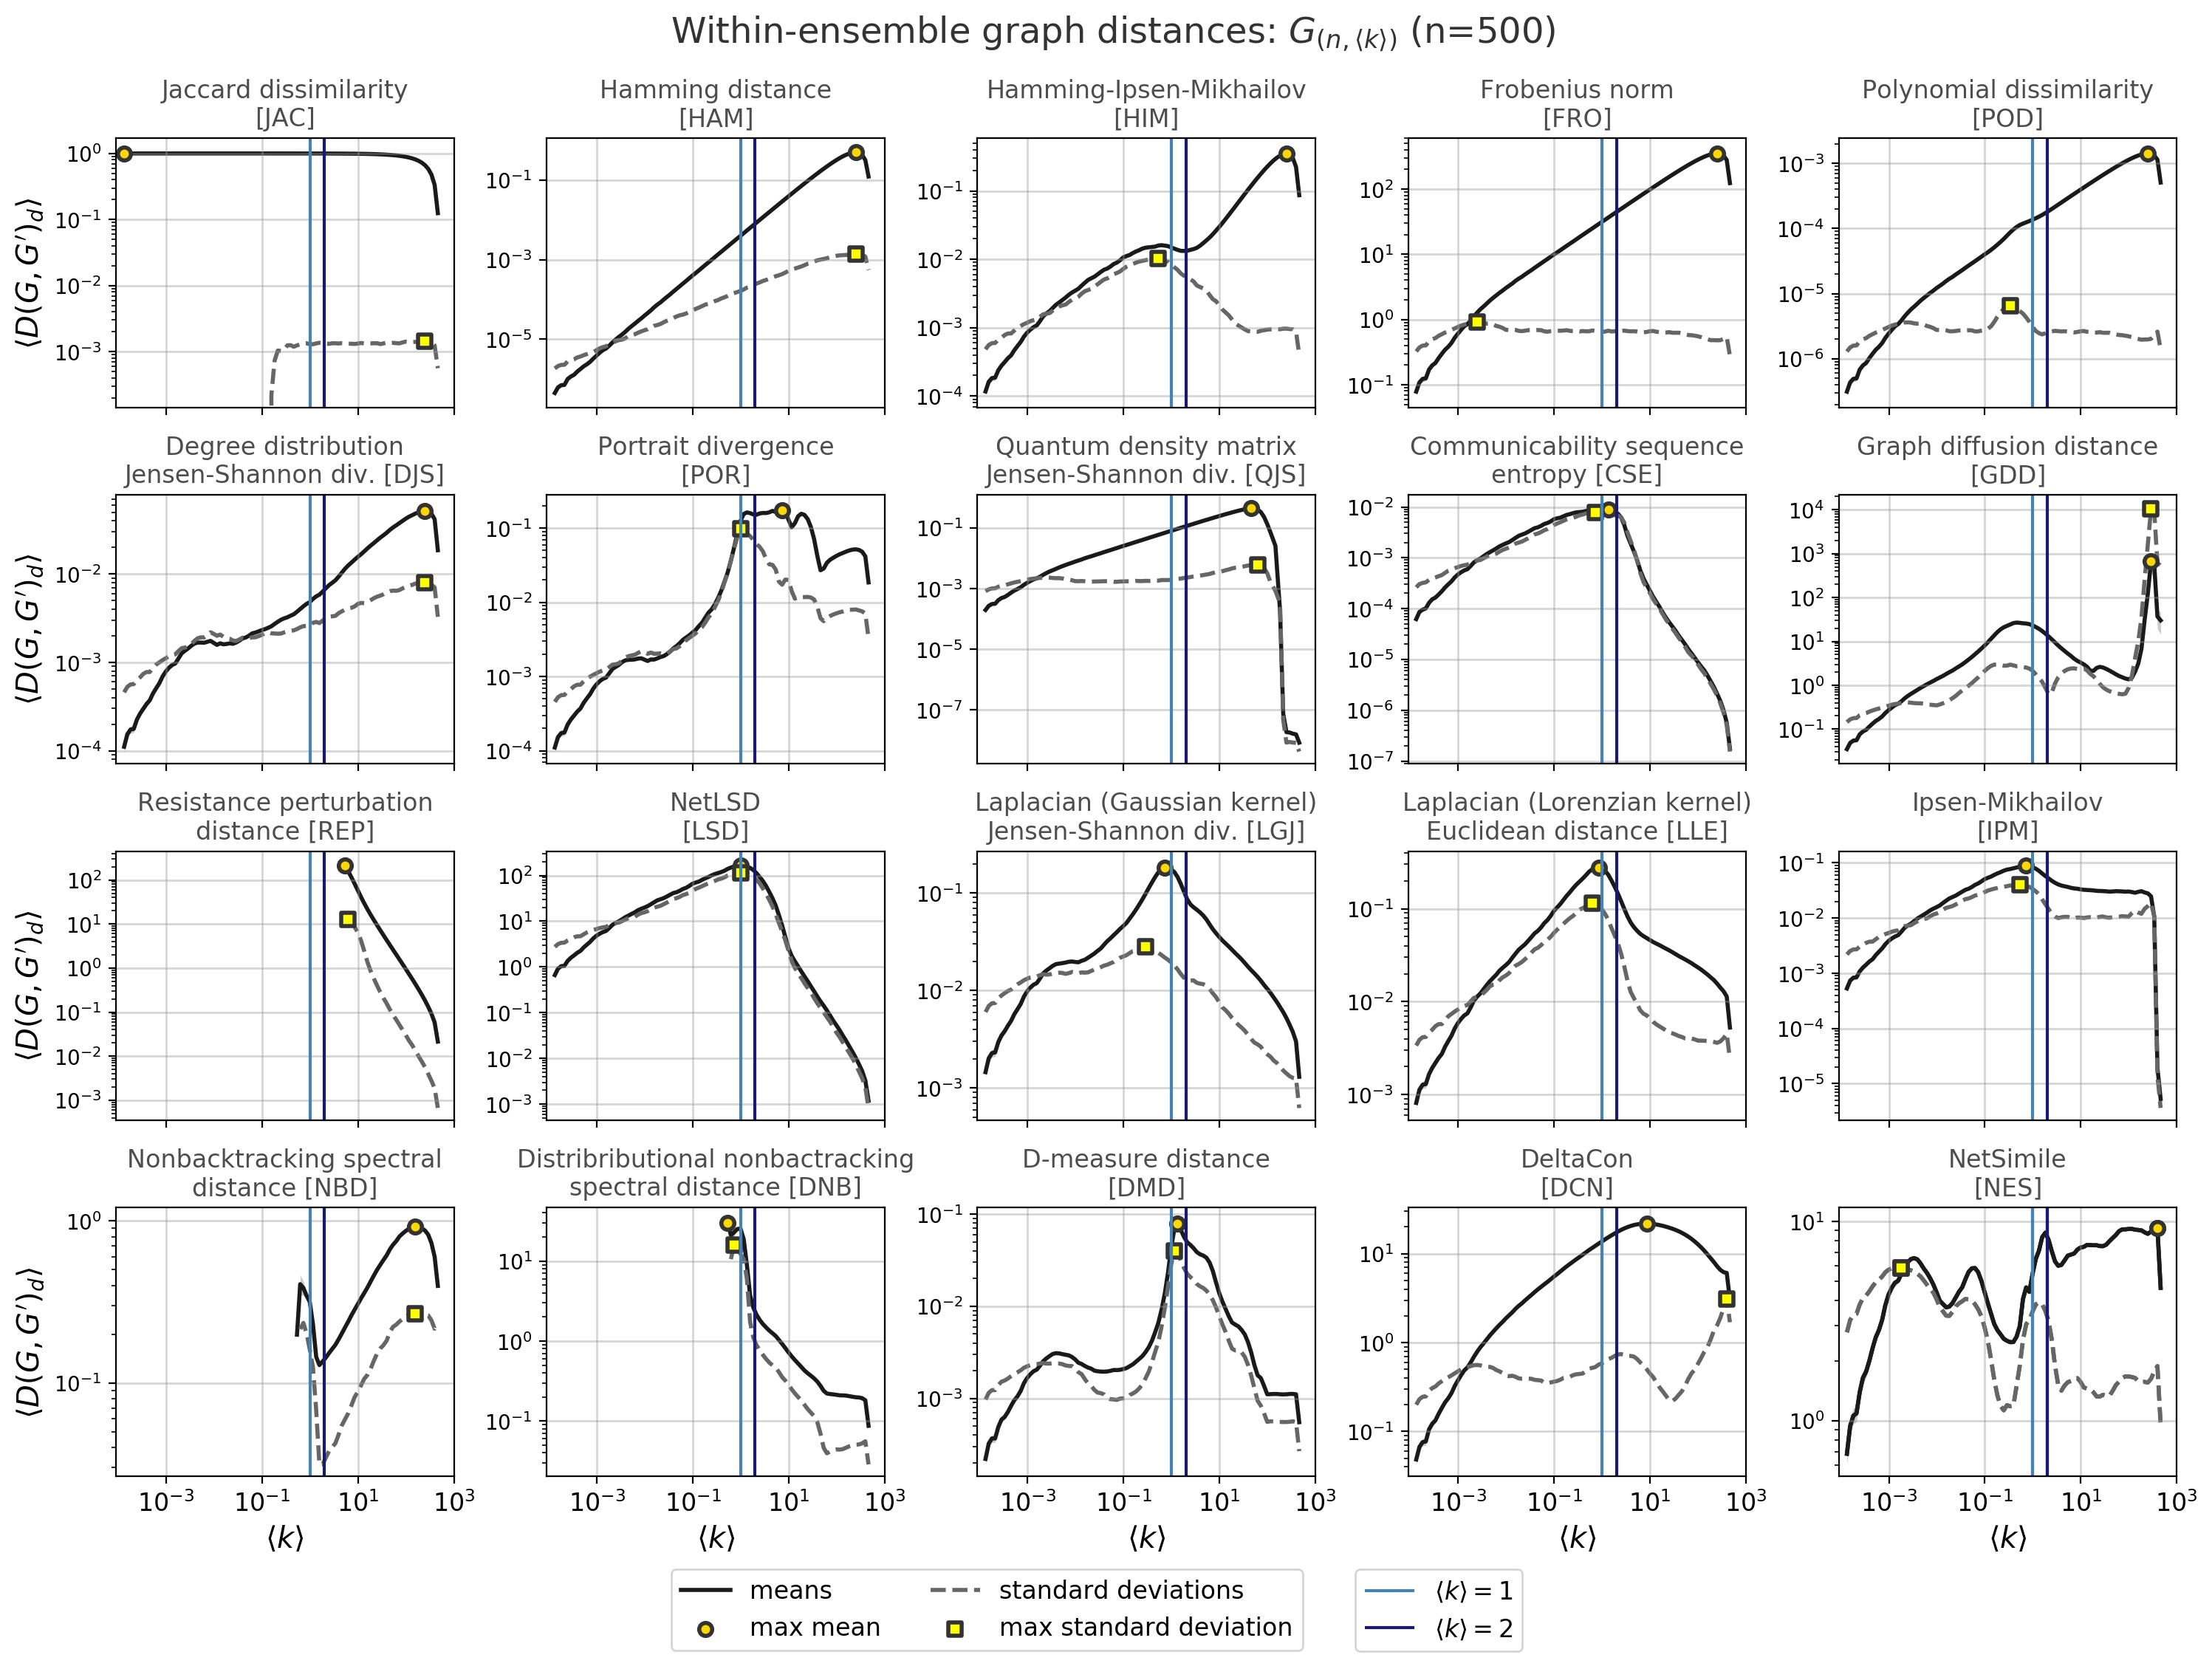

In [6]:
ncols = 5; nrows = 4
w = 3.6; h = 3.0

tups = list(it.product(range(nrows), range(ncols)))
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=200, sharex=True)
plt.subplots_adjust(wspace=0.275,hspace=0.325)
wid = 2

for ai, tup in enumerate(tups):
    d_lab = all_distance_function_names[ai]
    df_i = wegdf.loc[(wegdf['distance_label']==d_lab)].copy()
    xvals_i = df_i['param_value'].rolling(window=wid).mean().values
    means_i = df_i['d_mean'].rolling(window=wid).mean().values
    stdvs_i = df_i['d_stdv'].rolling(window=wid).mean().values
    max_i_mean = xvals_i[np.argmax(np.nan_to_num(means_i))]
    max_i_stdv = xvals_i[np.argmax(np.nan_to_num(stdvs_i))]
    nsamp_i = df_i['d_n'].values
    low_st = means_i-stdvs_i/(nsamp_i**0.5)
    upp_st = means_i+stdvs_i/(nsamp_i**0.5)
    
    ax[tup].plot(xvals_i, means_i, color='.1', linewidth=2, zorder=0)
    ax[tup].fill_between(xvals_i, low_st, upp_st, color='.5', zorder=0, alpha=0.4, linewidth=0)

    ax[tup].plot(xvals_i, stdvs_i, color='.4', linewidth=2, zorder=0, linestyle='--')
    ax[tup].scatter([max_i_mean], [np.nanmax(means_i)], c='gold', edgecolors='.2', lw=2, s=40)
    ax[tup].scatter([max_i_stdv], [np.nanmax(stdvs_i)], c='yellow', edgecolors='.2', lw=2, s=40, marker='s')

    ax[tup].set_title(title_dict[d_lab],fontsize='large',color='.3')
    ax[tup].grid(linewidth=1, color='.6', alpha=0.4)
                 
    ax[tup].set_yscale('log')
    ax[tup].set_xscale('log')
    ylim_i = ax[tup].get_ylim()
    ydiff = ylim_i[1] - ylim_i[0]
    ylim_i = (ylim_i[0], ylim_i[1]+0.1*ydiff)
    ax[tup].set_ylim(ylim_i[0], ylim_i[1])
    ax[tup].set_xlim(9e-5, 1e3)
    ax[tup].vlines(1, ylim_i[0], ylim_i[1], color='steelblue')
    ax[tup].vlines(2, ylim_i[0], ylim_i[1], color='midnightblue')

    if tup[0] == 3:
        ax[tup].set_xlabel(r'$\langle %s \rangle$'%param_label,fontsize='x-large')
        ax[tup].xaxis.set_tick_params(labelsize='large')

        if tup[1] == ncols-1:
            v1 = ax[tup].vlines(1, ylim_i[0], ylim_i[1], color='steelblue', label=r'$\langle k \rangle = 1$')
            v2 = ax[tup].vlines(2, ylim_i[0], ylim_i[1], color='midnightblue', label=r'$\langle k \rangle = 2$')

            legend2 = ax[tup].legend([v1, v2], [r'$\langle k \rangle = 1$', r'$\langle k \rangle = 2$'],
                                     bbox_to_anchor=[-0.9,-0.3], ncol=1, fontsize='large')
            m1, = ax[tup].plot(xvals_i, means_i, color='.1', linewidth=2, zorder=0, 
                              label='means')
            maxm = ax[tup].scatter([max_i_mean], [np.nanmax(means_i)], c='gold',
                                   edgecolors='.2', lw=2, s=40, label='max mean')
            s1, = ax[tup].plot(xvals_i, stdvs_i, color='.4', linewidth=2, zorder=0, linestyle='--',
                              label='standard deviations')
            maxs = ax[tup].scatter([max_i_stdv], [np.nanmax(stdvs_i)], c='yellow',
                                   edgecolors='.2', lw=2, s=40, label='max standard deviation', marker='s')
            
            legend1 = ax[tup].legend([m1, maxm, s1, maxs],
                                     ['means', 'max mean', 'standard deviations', 'max standard deviation'],
                                     bbox_to_anchor=[-1.55,-0.3], ncol=2, fontsize='large')
            ax[tup].add_artist(legend2)

    if tup[1] == 0:
        ax[tup].set_ylabel(r"$\langle D(G, G')_d \rangle$",fontsize='x-large')
    
plt.suptitle(r'Within-ensemble graph distances: $G_{(n, \langle k \rangle)}$ (n=%i)'%(n),
             fontsize='xx-large', y=0.95, color='.2')

plt.savefig('../figs/pngs/%s_wegd_%s_n%i.png'%(ensemble,param_label,n),bbox_inches='tight',dpi=425)
plt.savefig('../figs/pdfs/%s_wegd_%s_n%i.pdf'%(ensemble,param_label,n),bbox_inches='tight')

plt.show()

___________________

# WS

In [7]:
ws_df = pd.read_csv('../data/watts_strogatz.csv')
dir_name_no = '../data/wegd_ws_vary_pr.csv'
wegdf = pd.read_csv(dir_name_no)
param_label = wegdf.param_label.unique()[0]
n = wegdf.n.unique()[0]
k = wegdf.k.unique()[0]
ensemble = wegdf.ensemble.unique()[0]
print(wegdf.shape)
wegdf.head()

(1220, 9)


ensemble    n  k param_label  param_value      distance_label    d_mean  \
0       ws  500  8           p     0.000041  CommunicabilityJSD  0.000029   
1       ws  500  8           p     0.000041            DMeasure  0.036638   
2       ws  500  8           p     0.000041    DegreeDivergence  0.000282   
3       ws  500  8           p     0.000041            DeltaCon  2.351236   
4       ws  500  8           p     0.000041   DistributionalNBD  0.612609   

    d_n    d_stdv  
0  1000  0.000054  
1  1000  0.070205  
2  1000  0.000523  
3  1000  4.303659  
4  1000  1.139486

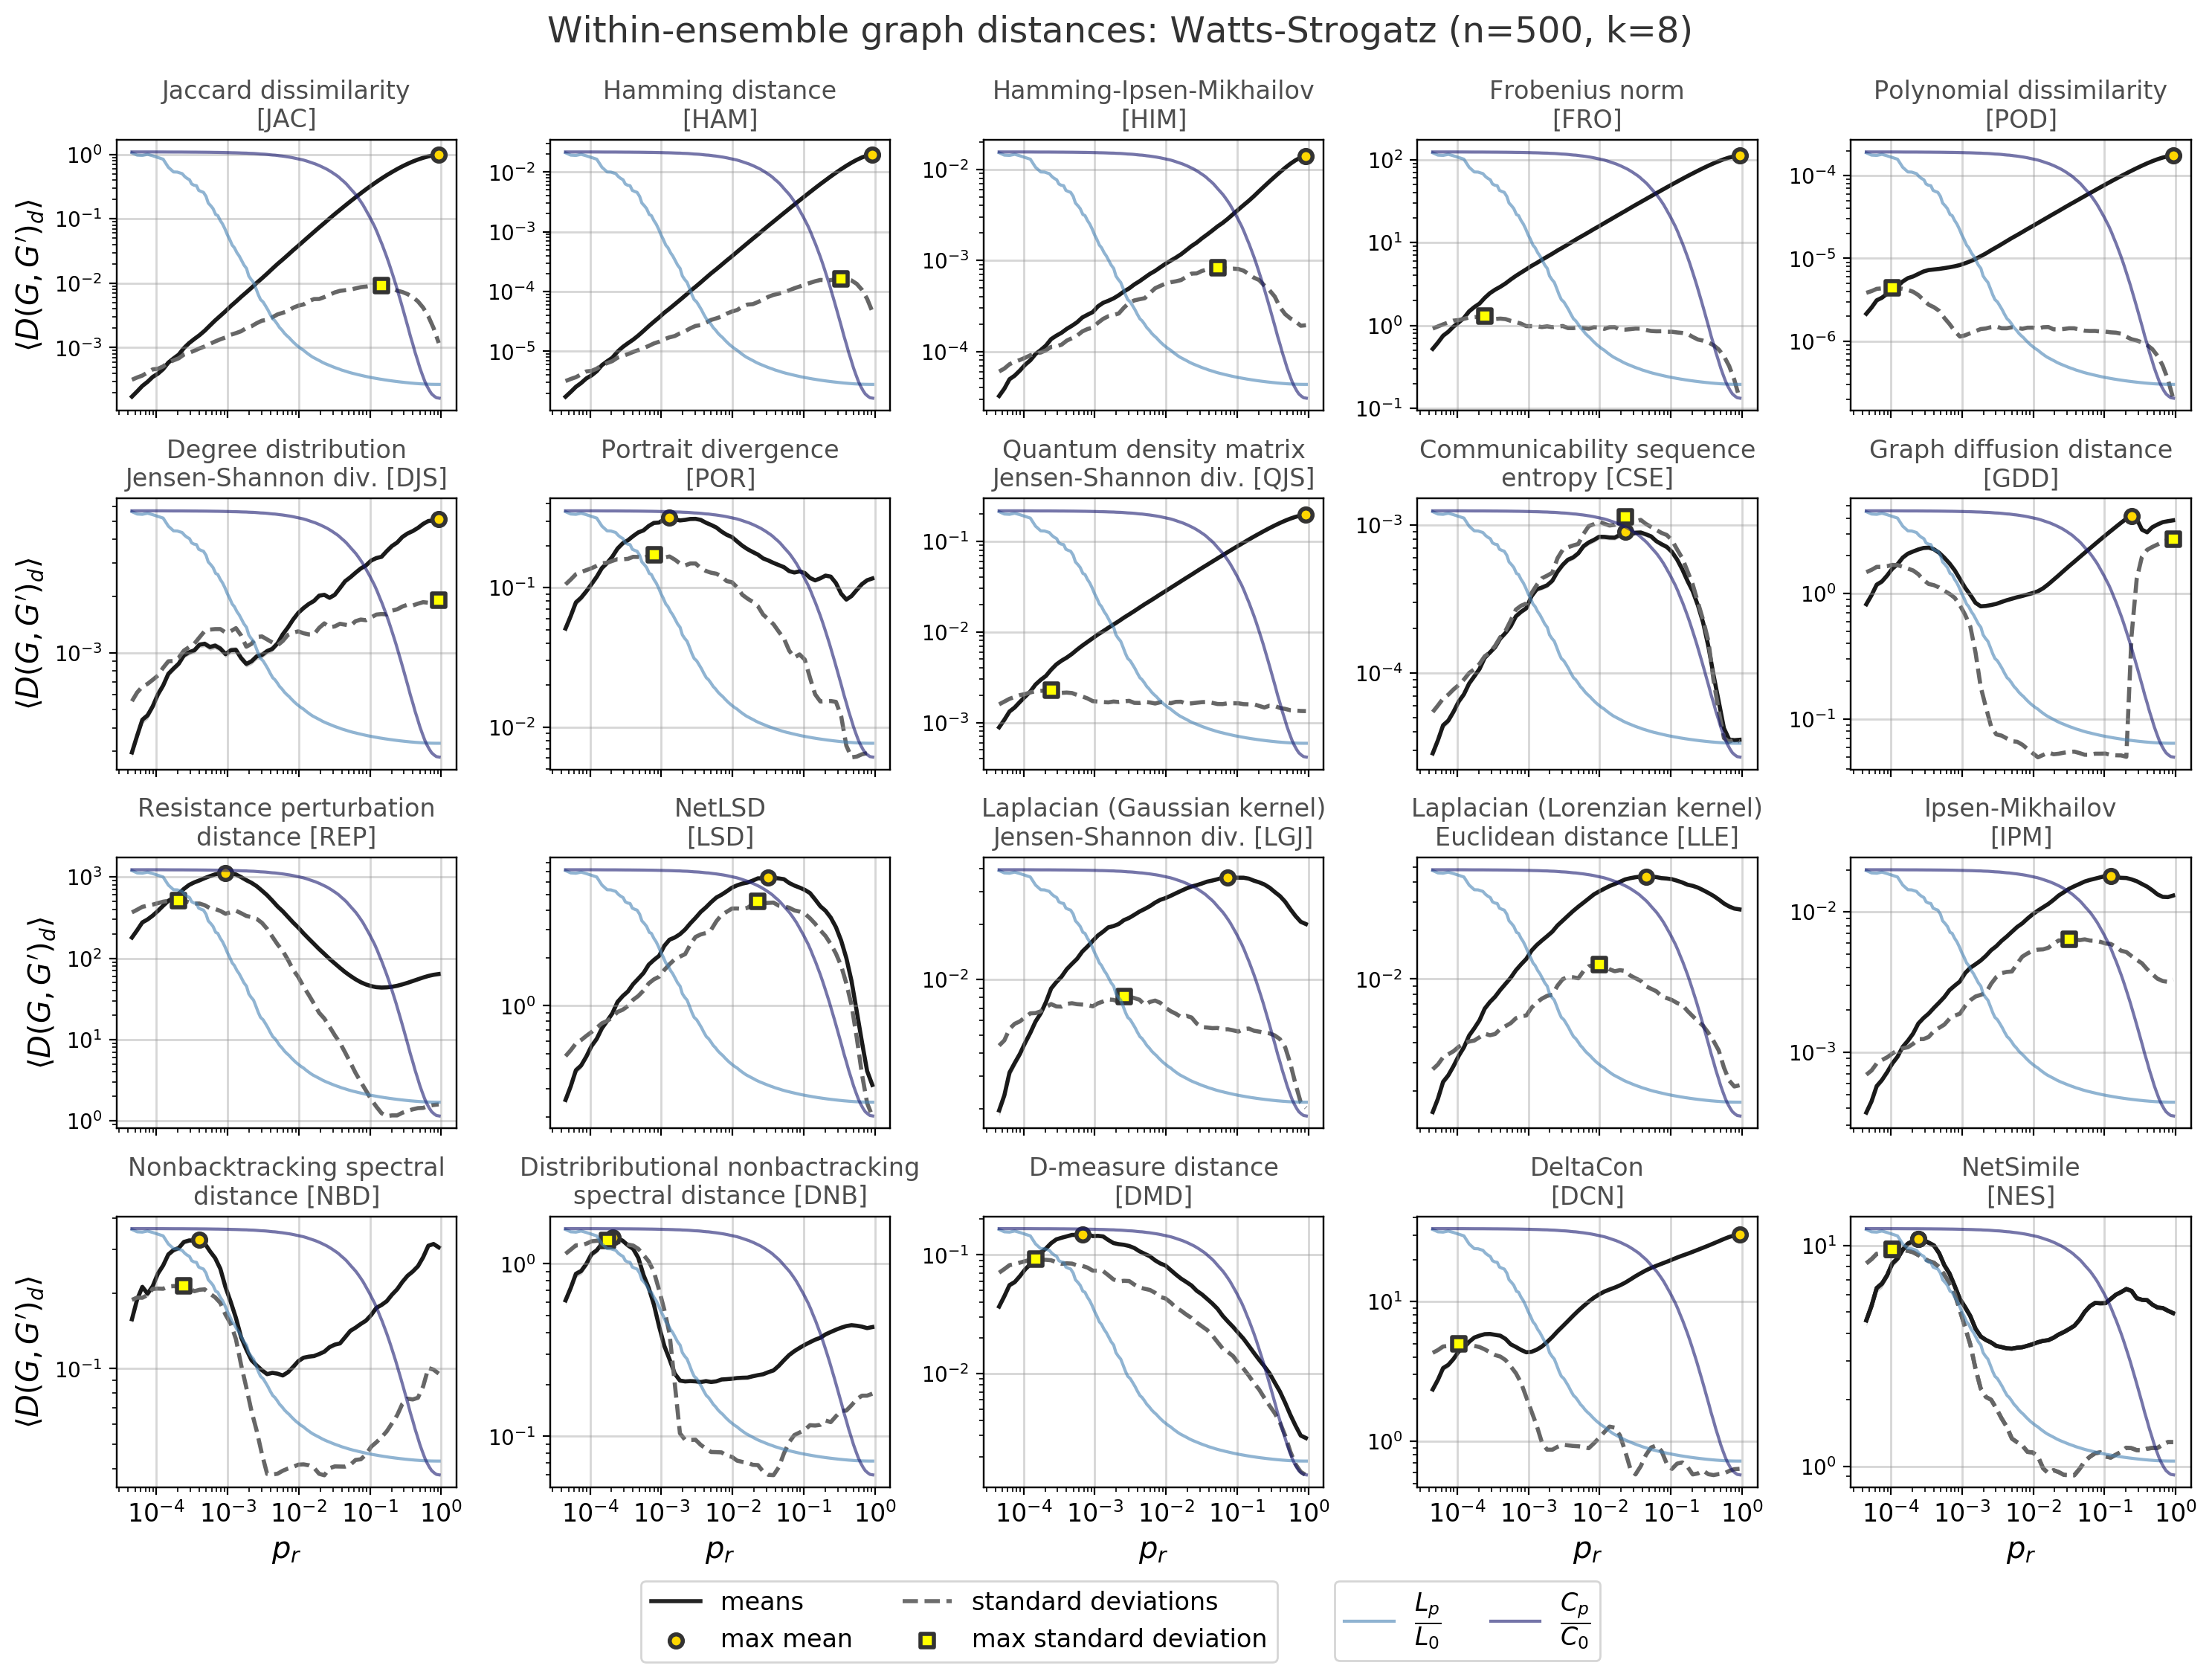

In [8]:
ncols = 5; nrows = 4
w = 3.6; h = 3.0

tups = list(it.product(range(nrows), range(ncols)))
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=200, sharex=True)
plt.subplots_adjust(wspace=0.275,hspace=0.325)

for ai, tup in enumerate(tups):
    d_lab = all_distance_function_names[ai]
    df_i = wegdf.loc[(wegdf['distance_label']==d_lab)].copy()

    xvals_i = df_i['param_value'].rolling(window=wid).mean().values
    means_i = df_i['d_mean'].rolling(window=wid).mean().values
    stdvs_i = df_i['d_stdv'].rolling(window=wid).mean().values
    max_i_mean = xvals_i[np.argmax(np.nan_to_num(means_i))]
    max_i_stdv = xvals_i[np.argmax(np.nan_to_num(stdvs_i))]
    nsamp_i = df_i['d_n'].values
    low_st = means_i-stdvs_i/(nsamp_i**0.5)
    upp_st = means_i+stdvs_i/(nsamp_i**0.5)
    
    ax[tup].plot(xvals_i, means_i, color='.1', linewidth=2, zorder=0)
    ax[tup].fill_between(xvals_i, low_st, upp_st, color='.5', zorder=0, alpha=0.4, linewidth=0)
    ax[tup].plot(xvals_i, stdvs_i, color='.4', linewidth=2, zorder=0, linestyle='--')
    ax[tup].scatter([max_i_mean], [np.nanmax(means_i)], c='gold', edgecolors='.2', lw=2, s=40)
    ax[tup].scatter([max_i_stdv], [np.nanmax(stdvs_i)], c='yellow', edgecolors='.2', lw=2, s=40, marker='s')

    ax[tup].set_title(title_dict[d_lab],fontsize='large',color='.3')
    ax[tup].grid(linewidth=1, color='.6', alpha=0.4)
                 
    ax[tup].set_yscale('log')
    ax[tup].set_xscale('log')
    ylim_i = ax[tup].get_ylim()
    ydiff = ylim_i[1] - ylim_i[0]
    ylim_i = (ylim_i[0], ylim_i[1]+0.1*ydiff)
    ax[tup].set_ylim(ylim_i[0], ylim_i[1])
    if tup != (nrows-1,ncols-1):
        ax2 = ax[tup].twinx()
        ax2.plot(ws_df['p'].rolling(window=wid).mean().values,
                 ws_df['path_length'].rolling(window=wid).mean().values,
                 color='steelblue', alpha=0.6)
        ax2.plot(ws_df['p'].rolling(window=wid).mean().values,
                 ws_df['clustering'].rolling(window=wid).mean().values,
                 color='midnightblue', alpha=0.6)
        ax2.set_yticks([])

    if tup[0] == nrows-1:
        ax[tup].set_xlabel(r'$%s_r$'%param_label,fontsize='x-large')
        ax[tup].xaxis.set_tick_params(labelsize='large')
        if tup[1] == ncols-1:
            plotmean, = ax[tup].plot(xvals_i, means_i, color='.1',
                                    linewidth=2, alpha=0.95, zorder=0, label='means')
            maxm = ax[tup].scatter([max_i_mean], [np.nanmax(means_i)], c='gold',
                                   edgecolors='.2', lw=2, s=40, label='max mean')
            plotstdv, = ax[tup].plot(xvals_i, stdvs_i, color='.4', linewidth=2, alpha=0.95,
                                    zorder=0, linestyle='--', label='standard deviations')
            maxs = ax[tup].scatter([max_i_stdv], [np.nanmax(stdvs_i)], c='yellow',
                                   edgecolors='.2', lw=2, s=40, label='max standard deviation', marker='s')
            
            ax2 = ax[tup].twinx()
            ax2.plot(ws_df['p'].rolling(window=wid).mean().values,
                     ws_df['path_length'].rolling(window=wid).mean().values,
                     color='steelblue', alpha=0.6, label=r'$\dfrac{L_{p}}{L_{0}}$')
            ax2.plot(ws_df['p'].rolling(window=wid).mean().values,
                     ws_df['clustering'].rolling(window=wid).mean().values,
                     color='midnightblue', alpha=0.6, label=r'$\dfrac{C_{p}}{C_{0}}$')
            ax2.set_yticks([])

            legend2 = ax[tup].legend([plotmean, maxm, plotstdv, maxs],
                                     ['means', 'max mean', 'standard deviations', 'max standard deviation'],
                                     bbox_to_anchor=[-1.65,-0.3], ncol=2, fontsize='large')

            ax2.legend(bbox_to_anchor=[-0.7,-0.3], ncol=2, fontsize='large')


    if tup[1] == 0:
        ax[tup].set_ylabel(r"$\langle D(G, G')_d \rangle$",fontsize='x-large')

plt.suptitle('Within-ensemble graph distances: Watts-Strogatz (n=%i, k=%i)'%(n,k),
             fontsize='xx-large', y=0.95, color='.2')

plt.savefig('../figs/pngs/%s_wegd_%s_n%i_k%i.png'%(ensemble,param_label,n,k),bbox_inches='tight',dpi=425)
plt.savefig('../figs/pdfs/%s_wegd_%s_n%i_k%i.pdf'%(ensemble,param_label,n,k),bbox_inches='tight')

plt.show()

___________________

# SCM

In [9]:
dir_name_no = '../data/wegd_scm_vary_gamma.csv'
wegdf = pd.read_csv(dir_name_no)
param_label = wegdf.param_label.unique()[0]
n = wegdf.n.unique()[0]
k = wegdf.k.unique()[0]
ensemble = wegdf.ensemble.unique()[0]
print(wegdf.shape)
wegdf.head()

(1612, 9)


ensemble     n   k param_label  param_value      distance_label    d_mean  \
0      scm  1000  12       gamma         2.01  CommunicabilityJSD  0.127137   
1      scm  1000  12       gamma         2.01            DMeasure  0.098868   
2      scm  1000  12       gamma         2.01    DegreeDivergence  0.134537   
3      scm  1000  12       gamma         2.01            DeltaCon  6.312903   
4      scm  1000  12       gamma         2.01   DistributionalNBD  6.971325   

    d_n    d_stdv  
0  1172  0.236037  
1  1172  0.176000  
2  1172  0.272129  
3  1172  5.812333  
4  1170  4.366485

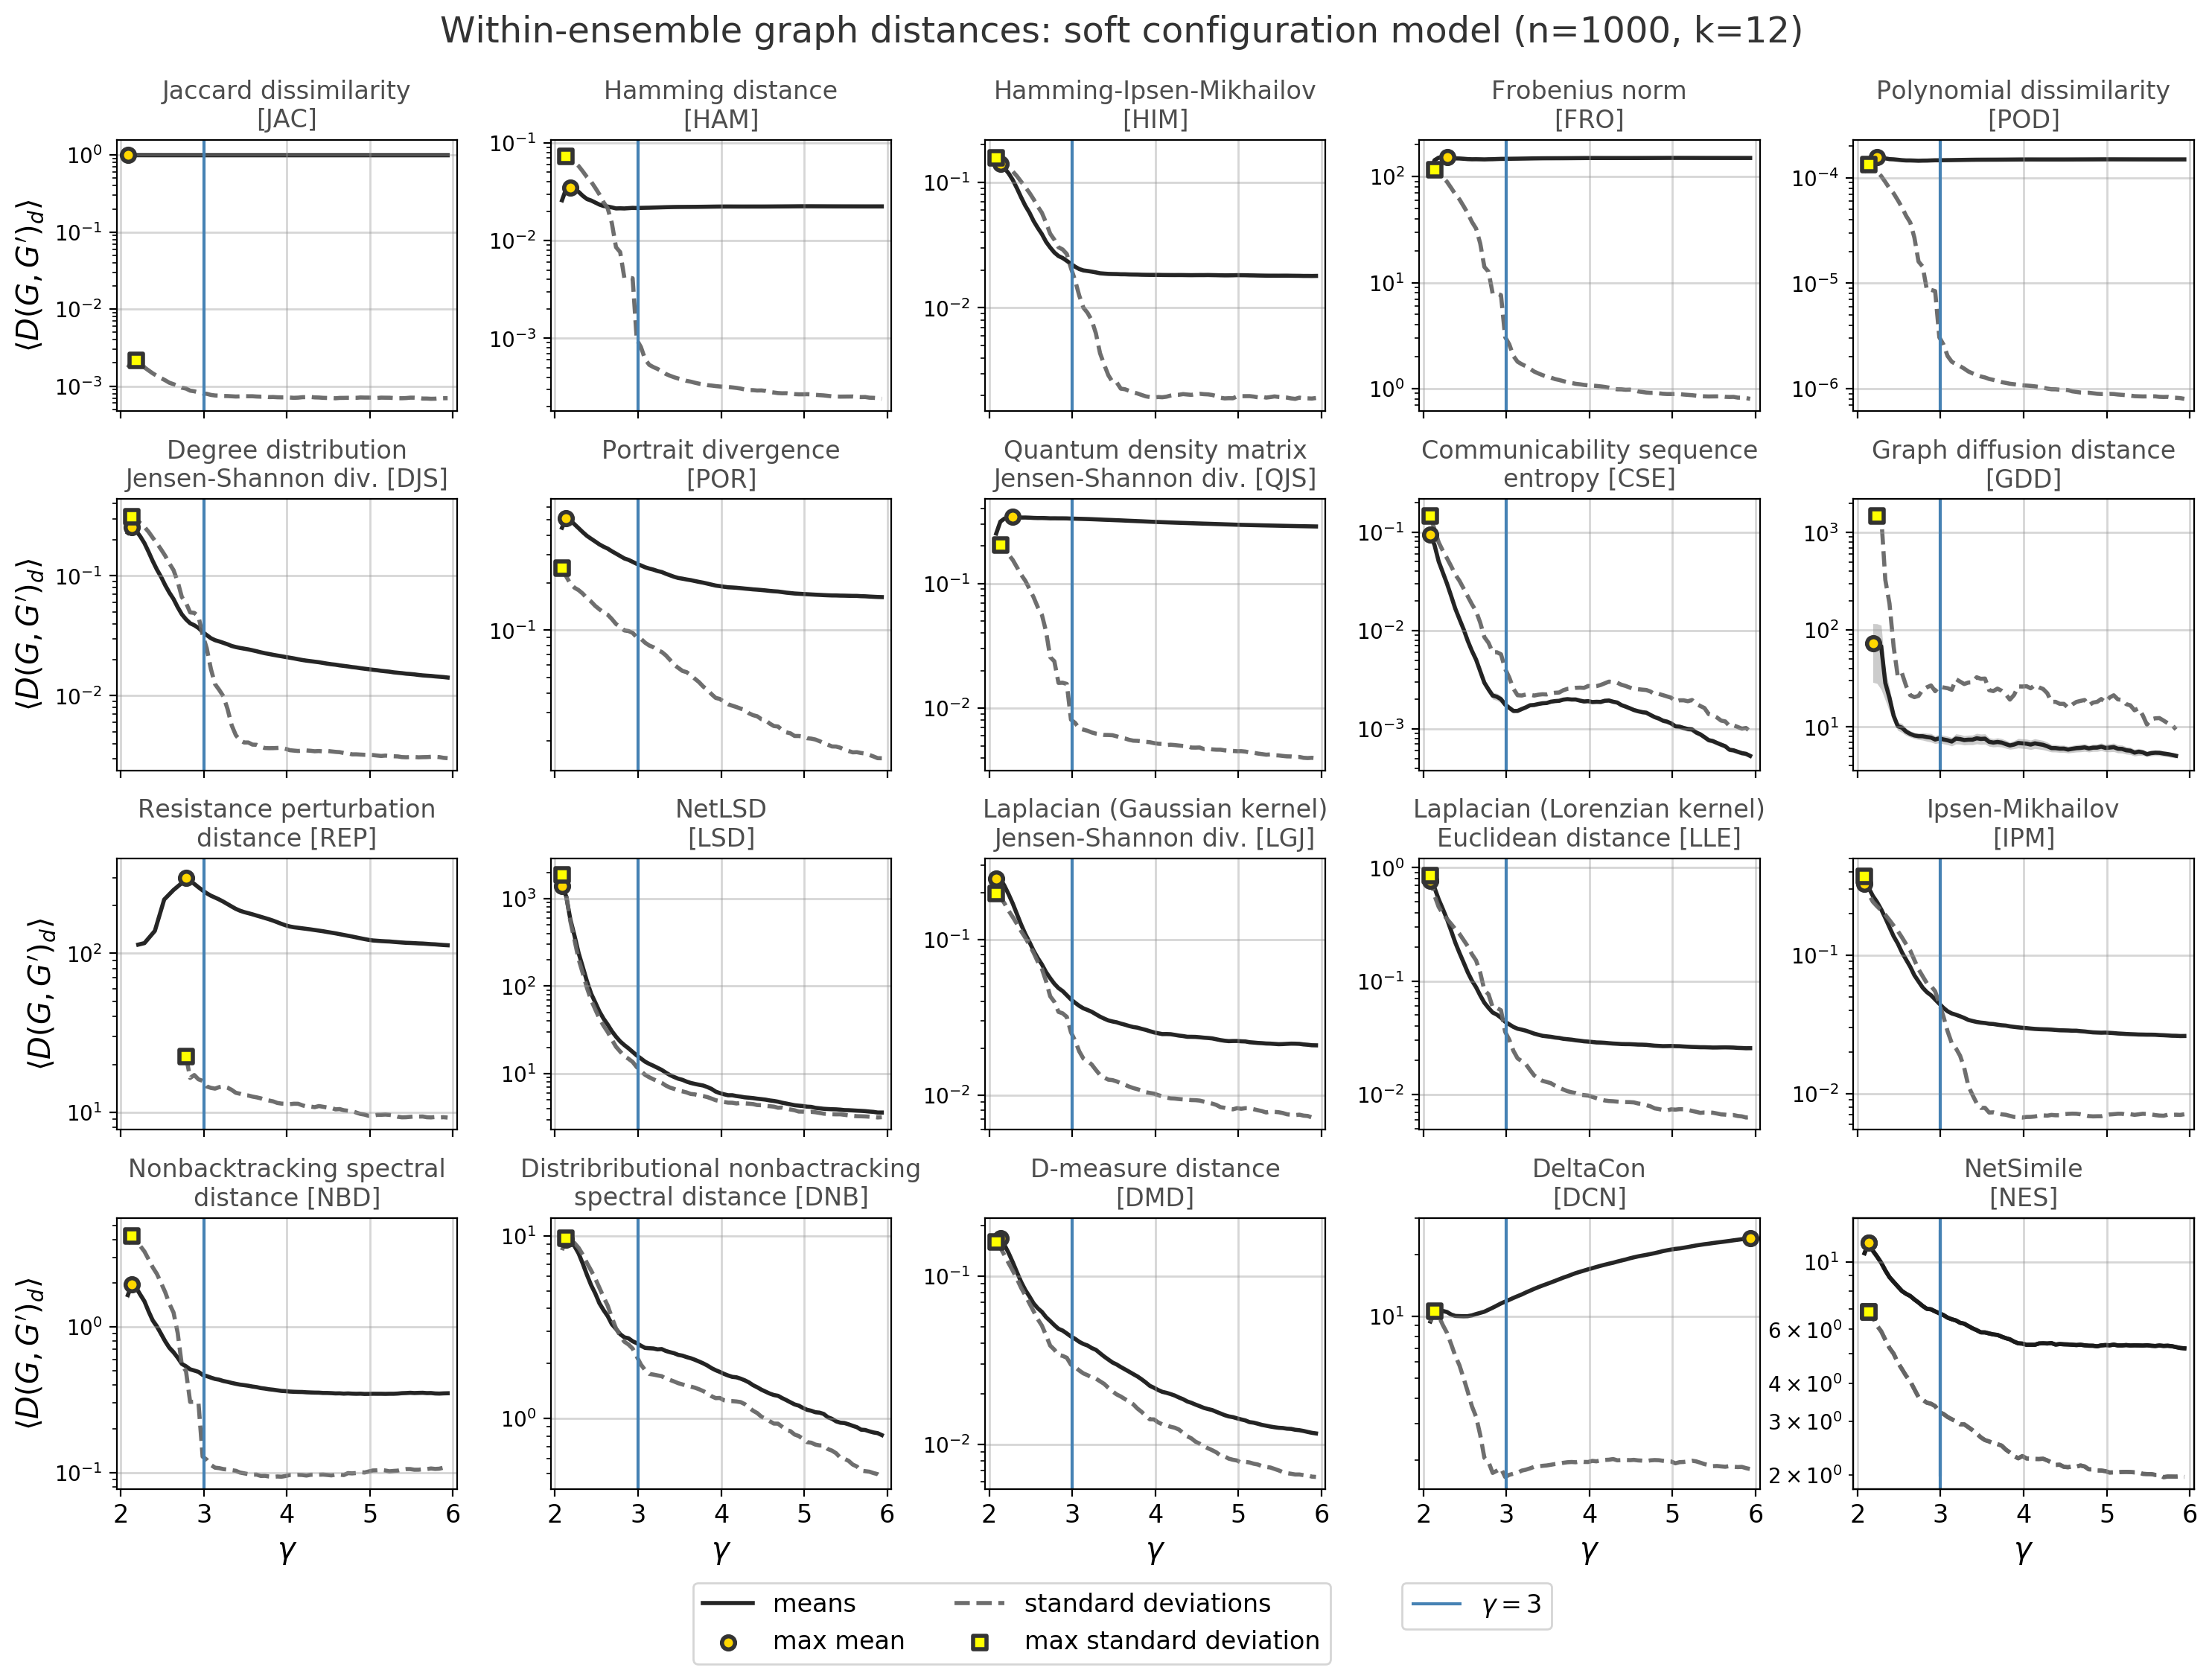

In [10]:
ncols = 5; nrows = 4
w = 3.6; h = 3.0

tups = list(it.product(range(nrows), range(ncols)))
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=200, sharex=True)
plt.subplots_adjust(wspace=0.275,hspace=0.325)
wid = 4

for ai, tup in enumerate(tups):
    d_lab = all_distance_function_names[ai]
    df_i = wegdf.loc[(wegdf['distance_label']==d_lab)&(wegdf['k']==k)].copy()
    if d_lab == 'GraphDiffusion':
        wid = 8
    else:
        wid = 4

    xvals_i = df_i['param_value'].rolling(window=wid).mean().values
    means_i = df_i['d_mean'].rolling(window=wid).mean().values
    stdvs_i = df_i['d_stdv'].rolling(window=wid).mean().values
    max_i_mean = xvals_i[np.argmax(np.nan_to_num(means_i))]
    max_i_stdv = xvals_i[np.argmax(np.nan_to_num(stdvs_i))]
    nsamp_i = df_i['d_n'].values
    low_st = means_i-stdvs_i/(nsamp_i**0.5)
    upp_st = means_i+stdvs_i/(nsamp_i**0.5)
    
    ax[tup].plot(xvals_i, means_i, color='.1', linewidth=2, alpha=0.95, zorder=0)
    ax[tup].fill_between(xvals_i, low_st, upp_st, color='.5', zorder=0, alpha=0.4, linewidth=0)
    ax[tup].scatter([max_i_mean], [np.nanmax(means_i)], c='gold', edgecolors='.2', lw=2, s=40)
    ax[tup].plot(xvals_i, stdvs_i, color='.4', linewidth=2, alpha=0.95, zorder=0, linestyle='--')
    ax[tup].scatter([max_i_stdv], [np.nanmax(stdvs_i)], c='yellow', edgecolors='.2', lw=2, s=40, marker='s')

    ax[tup].set_title(title_dict[d_lab],fontsize='large',color='.3')
    ax[tup].grid(linewidth=1, color='.6', alpha=0.4)
                 
    ax[tup].set_yscale('log')
    ylim_i = ax[tup].get_ylim()
    ydiff = ylim_i[1] - ylim_i[0]
    ylim_i = (ylim_i[0], ylim_i[1]+0.1*ydiff)
    ax[tup].vlines(3, ylim_i[0], ylim_i[1], color='steelblue')
    ax[tup].set_ylim(ylim_i[0], ylim_i[1])

    if tup[0] == nrows-1:
        ax[tup].set_xlabel(r'$\%s$'%param_label,fontsize='x-large')
        ax[tup].xaxis.set_tick_params(labelsize='large')
        if tup[1] == ncols-1:
            plotmean, = ax[tup].plot(xvals_i, means_i, color='.1',
                                    linewidth=2, alpha=0.95, zorder=0, label='means')
            maxm = ax[tup].scatter([max_i_mean], [np.nanmax(means_i)], c='gold',
                                   edgecolors='.2', lw=2, s=40, label='max mean')
            plotstdv, = ax[tup].plot(xvals_i, stdvs_i, color='.4', linewidth=2, alpha=0.95,
                                    zorder=0, linestyle='--', label='standard deviations')
            maxs = ax[tup].scatter([max_i_stdv], [np.nanmax(stdvs_i)], c='yellow',
                                   edgecolors='.2', lw=2, s=40, label='max standard deviation', marker='s')
            
            ax2 = ax[tup].twinx()
            ax2.vlines(3, ylim_i[0], ylim_i[1], color='steelblue', label=r'$\gamma = 3$')
            ax2.set_yticks([])

            legend2 = ax[tup].legend([plotmean, maxm, plotstdv, maxs],
                                     ['means', 'max mean', 'standard deviations', 'max standard deviation'],
                                     bbox_to_anchor=[-1.5,-0.3], ncol=2, fontsize='large')

            ax2.legend(bbox_to_anchor=[-0.85,-0.3], ncol=2, fontsize='large')

    if tup[1] == 0:
        ax[tup].set_ylabel(r"$\langle D(G, G')_d \rangle$",fontsize='x-large')

    ax[tup].set_xlim(1.95,6.05)

plt.suptitle(r'Within-ensemble graph distances: soft configuration model (n=%i, k=%i)'%(n,k),
             fontsize='xx-large', y=0.95, color='.2')

plt.savefig('../figs/pngs/%s_wegd_%s_n%i_k%i.png'%(ensemble,param_label,n,k),bbox_inches='tight',dpi=425)
plt.savefig('../figs/pdfs/%s_wegd_%s_n%i_k%i.pdf'%(ensemble,param_label,n,k),bbox_inches='tight')

plt.show()

___________________

# pref attach

In [11]:
dir_name_no = '../data/wegd_pa_vary_alpha.csv'
wegdf = pd.read_csv(dir_name_no)
param_label = wegdf.param_label.unique()[0]
n = wegdf.n.unique()[0]
k = wegdf.k.unique()[0]
ensemble = wegdf.ensemble.unique()[0]
print(wegdf.shape)
wegdf.head()

(1620, 9)


ensemble    n  k param_label  param_value      distance_label     d_mean  \
0       pa  500  4       alpha         -5.0  CommunicabilityJSD   0.000097   
1       pa  500  4       alpha         -5.0            DMeasure   0.007679   
2       pa  500  4       alpha         -5.0    DegreeDivergence   0.002524   
3       pa  500  4       alpha         -5.0            DeltaCon  24.756104   
4       pa  500  4       alpha         -5.0   DistributionalNBD   0.744945   

    d_n    d_stdv  
0  2316  0.000060  
1  2316  0.003354  
2  2316  0.001588  
3  2316  0.645146  
4  2316  0.238197

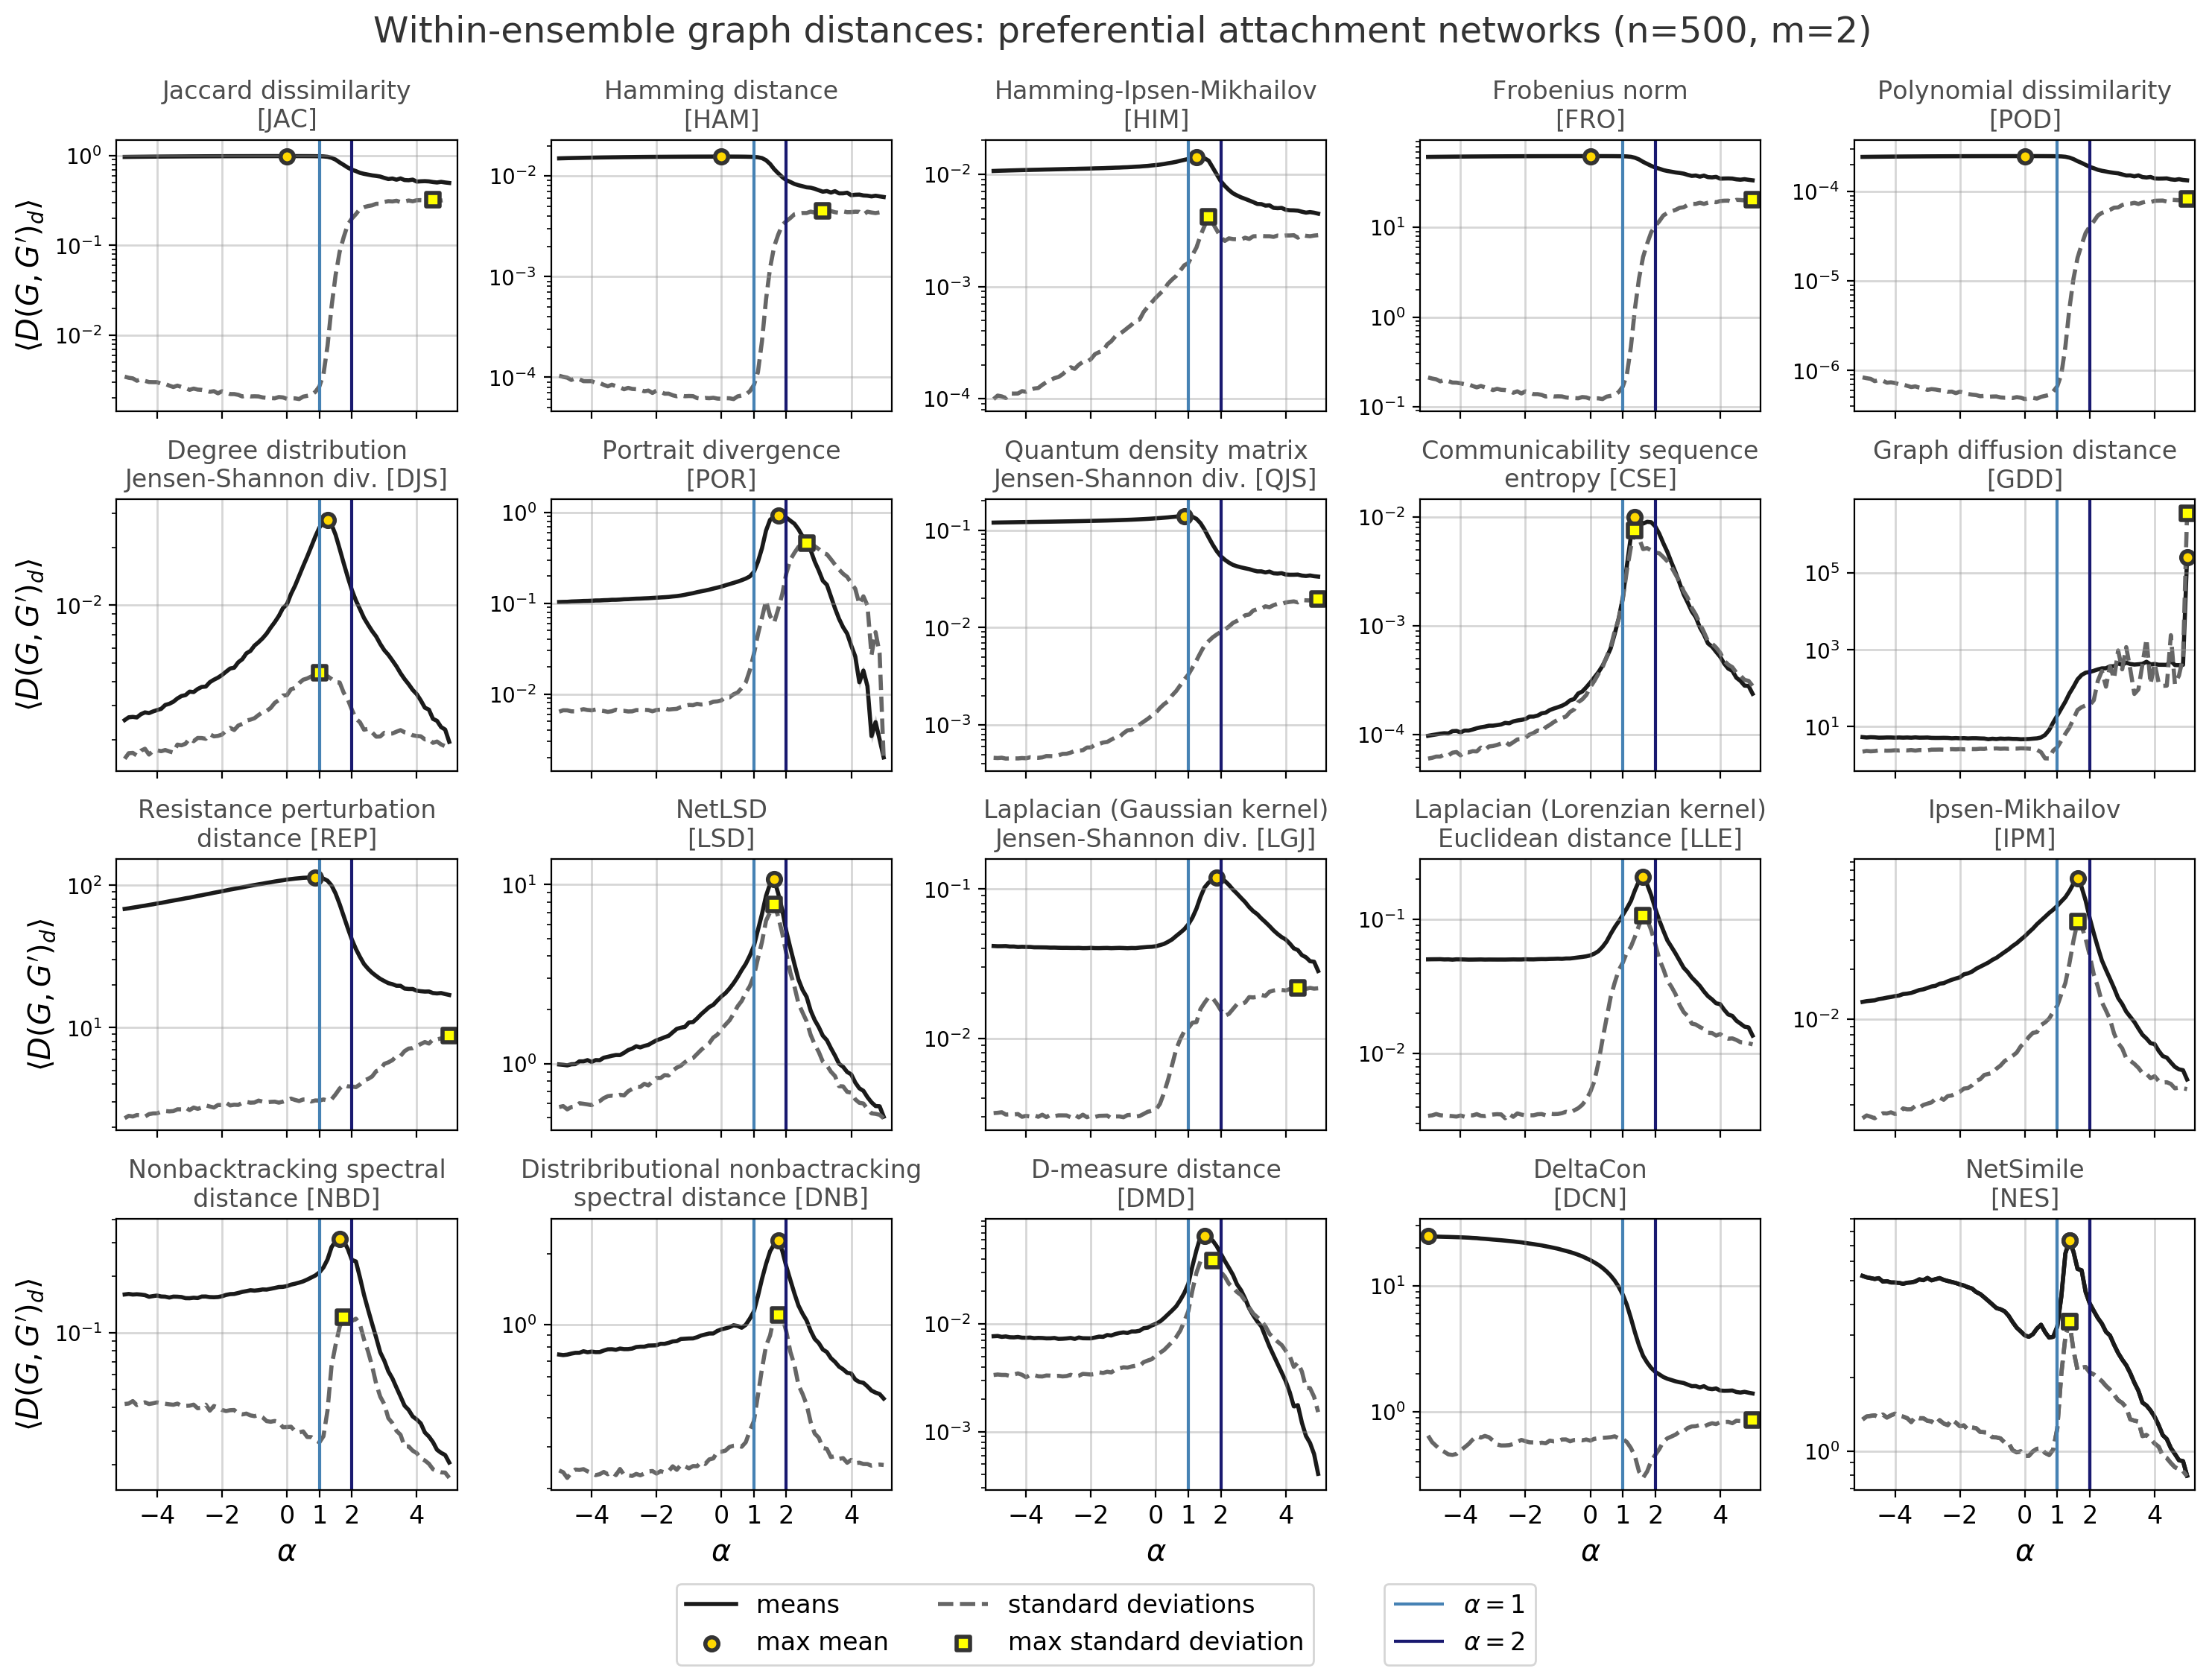

In [12]:
ncols = 5; nrows = 4
w = 3.6; h = 3.0

tups = list(it.product(range(nrows), range(ncols)))
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=200, sharex=True)
plt.subplots_adjust(wspace=0.275,hspace=0.325)

for ai, tup in enumerate(tups):
    d_lab = all_distance_function_names[ai]
    df_i = wegdf.loc[(wegdf['distance_label']==d_lab)].copy()
    xvals_i = df_i['param_value'].values
    means_i = df_i['d_mean'].values
    stdvs_i = df_i['d_stdv'].values
    max_i_mean = xvals_i[np.argmax(np.nan_to_num(means_i))]
    max_i_stdv = xvals_i[np.argmax(np.nan_to_num(stdvs_i))]
    nsamp_i = df_i['d_n'].values
    low_st = means_i-stdvs_i/(nsamp_i**0.5)
    upp_st = means_i+stdvs_i/(nsamp_i**0.5)
    
    ax[tup].plot(xvals_i, means_i, color='.1', linewidth=2, zorder=0)
    ax[tup].fill_between(xvals_i, low_st, upp_st, color='.5', zorder=0, alpha=0.4, linewidth=0)
    ax[tup].plot(xvals_i, stdvs_i, color='.4', linewidth=2, zorder=0, linestyle='--')
    ax[tup].scatter([max_i_mean], [np.nanmax(means_i)], c='gold', edgecolors='.2', lw=2, s=40)
    ax[tup].scatter([max_i_stdv], [np.nanmax(stdvs_i)], c='yellow', edgecolors='.2', lw=2, s=40, marker='s')

    ax[tup].set_title(title_dict[d_lab],fontsize='large',color='.3')
    ax[tup].grid(linewidth=1, color='.6', alpha=0.4)
                 
    ax[tup].set_yscale('log')
    ylim_i = ax[tup].get_ylim()
    ydiff = ylim_i[1] - ylim_i[0]
    ylim_i = (ylim_i[0], ylim_i[1]+0.1*ydiff)
    ax[tup].set_ylim(ylim_i[0], ylim_i[1])
    ax[tup].set_xlim(-5.25, 5.25)
    ax[tup].set_xticks([-4,-2,0,1,2,4])
    ax[tup].vlines(1, ylim_i[0], ylim_i[1], color='steelblue')
    ax[tup].vlines(2, ylim_i[0], ylim_i[1], color='midnightblue')

    if tup[0] == 3:
        ax[tup].set_xlabel(r'$\%s$'%param_label,fontsize='x-large')
        ax[tup].xaxis.set_tick_params(labelsize='large')
        if tup[1] == ncols-1:
            v1 = ax[tup].vlines(1, ylim_i[0], ylim_i[1], color='steelblue', label=r'$\alpha = 1$')
            v2 = ax[tup].vlines(2, ylim_i[0], ylim_i[1], color='midnightblue', label=r'$\alpha = 2$')

            legend2 = ax[tup].legend([v1, v2], [r'$\alpha = 1$', r'$\alpha = 2$'],
                                     bbox_to_anchor=[-0.9,-0.3], ncol=1, fontsize='large')
            m1, = ax[tup].plot(xvals_i, means_i, color='.1', linewidth=2, zorder=0, 
                              label='means')
            maxm = ax[tup].scatter([max_i_mean], [np.nanmax(means_i)], c='gold',
                                   edgecolors='.2', lw=2, s=40, label='max mean')
            s1, = ax[tup].plot(xvals_i, stdvs_i, color='.4', linewidth=2, zorder=0, linestyle='--',
                              label='standard deviations')
            maxs = ax[tup].scatter([max_i_stdv], [np.nanmax(stdvs_i)], c='yellow',
                                   edgecolors='.2', lw=2, s=40, label='max standard deviation', marker='s')
            
            legend1 = ax[tup].legend([m1, maxm, s1, maxs],
                                     ['means', 'max mean', 'standard deviations', 'max standard deviation'],
                                     bbox_to_anchor=[-1.55,-0.3], ncol=2, fontsize='large')
            ax[tup].add_artist(legend2)

    if tup[1] == 0:
        ax[tup].set_ylabel(r"$\langle D(G, G')_d \rangle$",fontsize='x-large')
    
plt.suptitle('Within-ensemble graph distances: preferential attachment networks (n=%i, m=%i)'%(n,int(k/2)),
             fontsize='xx-large', y=0.95, color='.2')

plt.savefig('../figs/pngs/%s_wegd_%s_n%i.png'%(ensemble,param_label,n),bbox_inches='tight',dpi=425)
plt.savefig('../figs/pdfs/%s_wegd_%s_n%i.pdf'%(ensemble,param_label,n),bbox_inches='tight')

plt.show()

________________

In [14]:
dir_name_no = '../data/wegd_gnp_vary_n.csv'
wegdf = pd.read_csv(dir_name_no)
param_label = wegdf.param_label.unique()[0]
print(wegdf.shape)
wegdf.head()

(836, 8)


ensemble   n param_label  param_value      distance_label     d_mean  d_n  \
0      gnk  31           n           31  CommunicabilityJSD   0.004240  352   
1      gnp  31           n           31            DeltaCon   4.566427  364   
2      gnp  31           n           31   DistributionalNBD   6.793248  364   
3      gnp  31           n           31           Frobenius  12.885425  364   
4      gnp  31           n           31      GraphDiffusion   2.329863  364   

     d_stdv  
0  0.004225  
1  0.230717  
2  2.190545  
3  0.580104  
4  0.212322

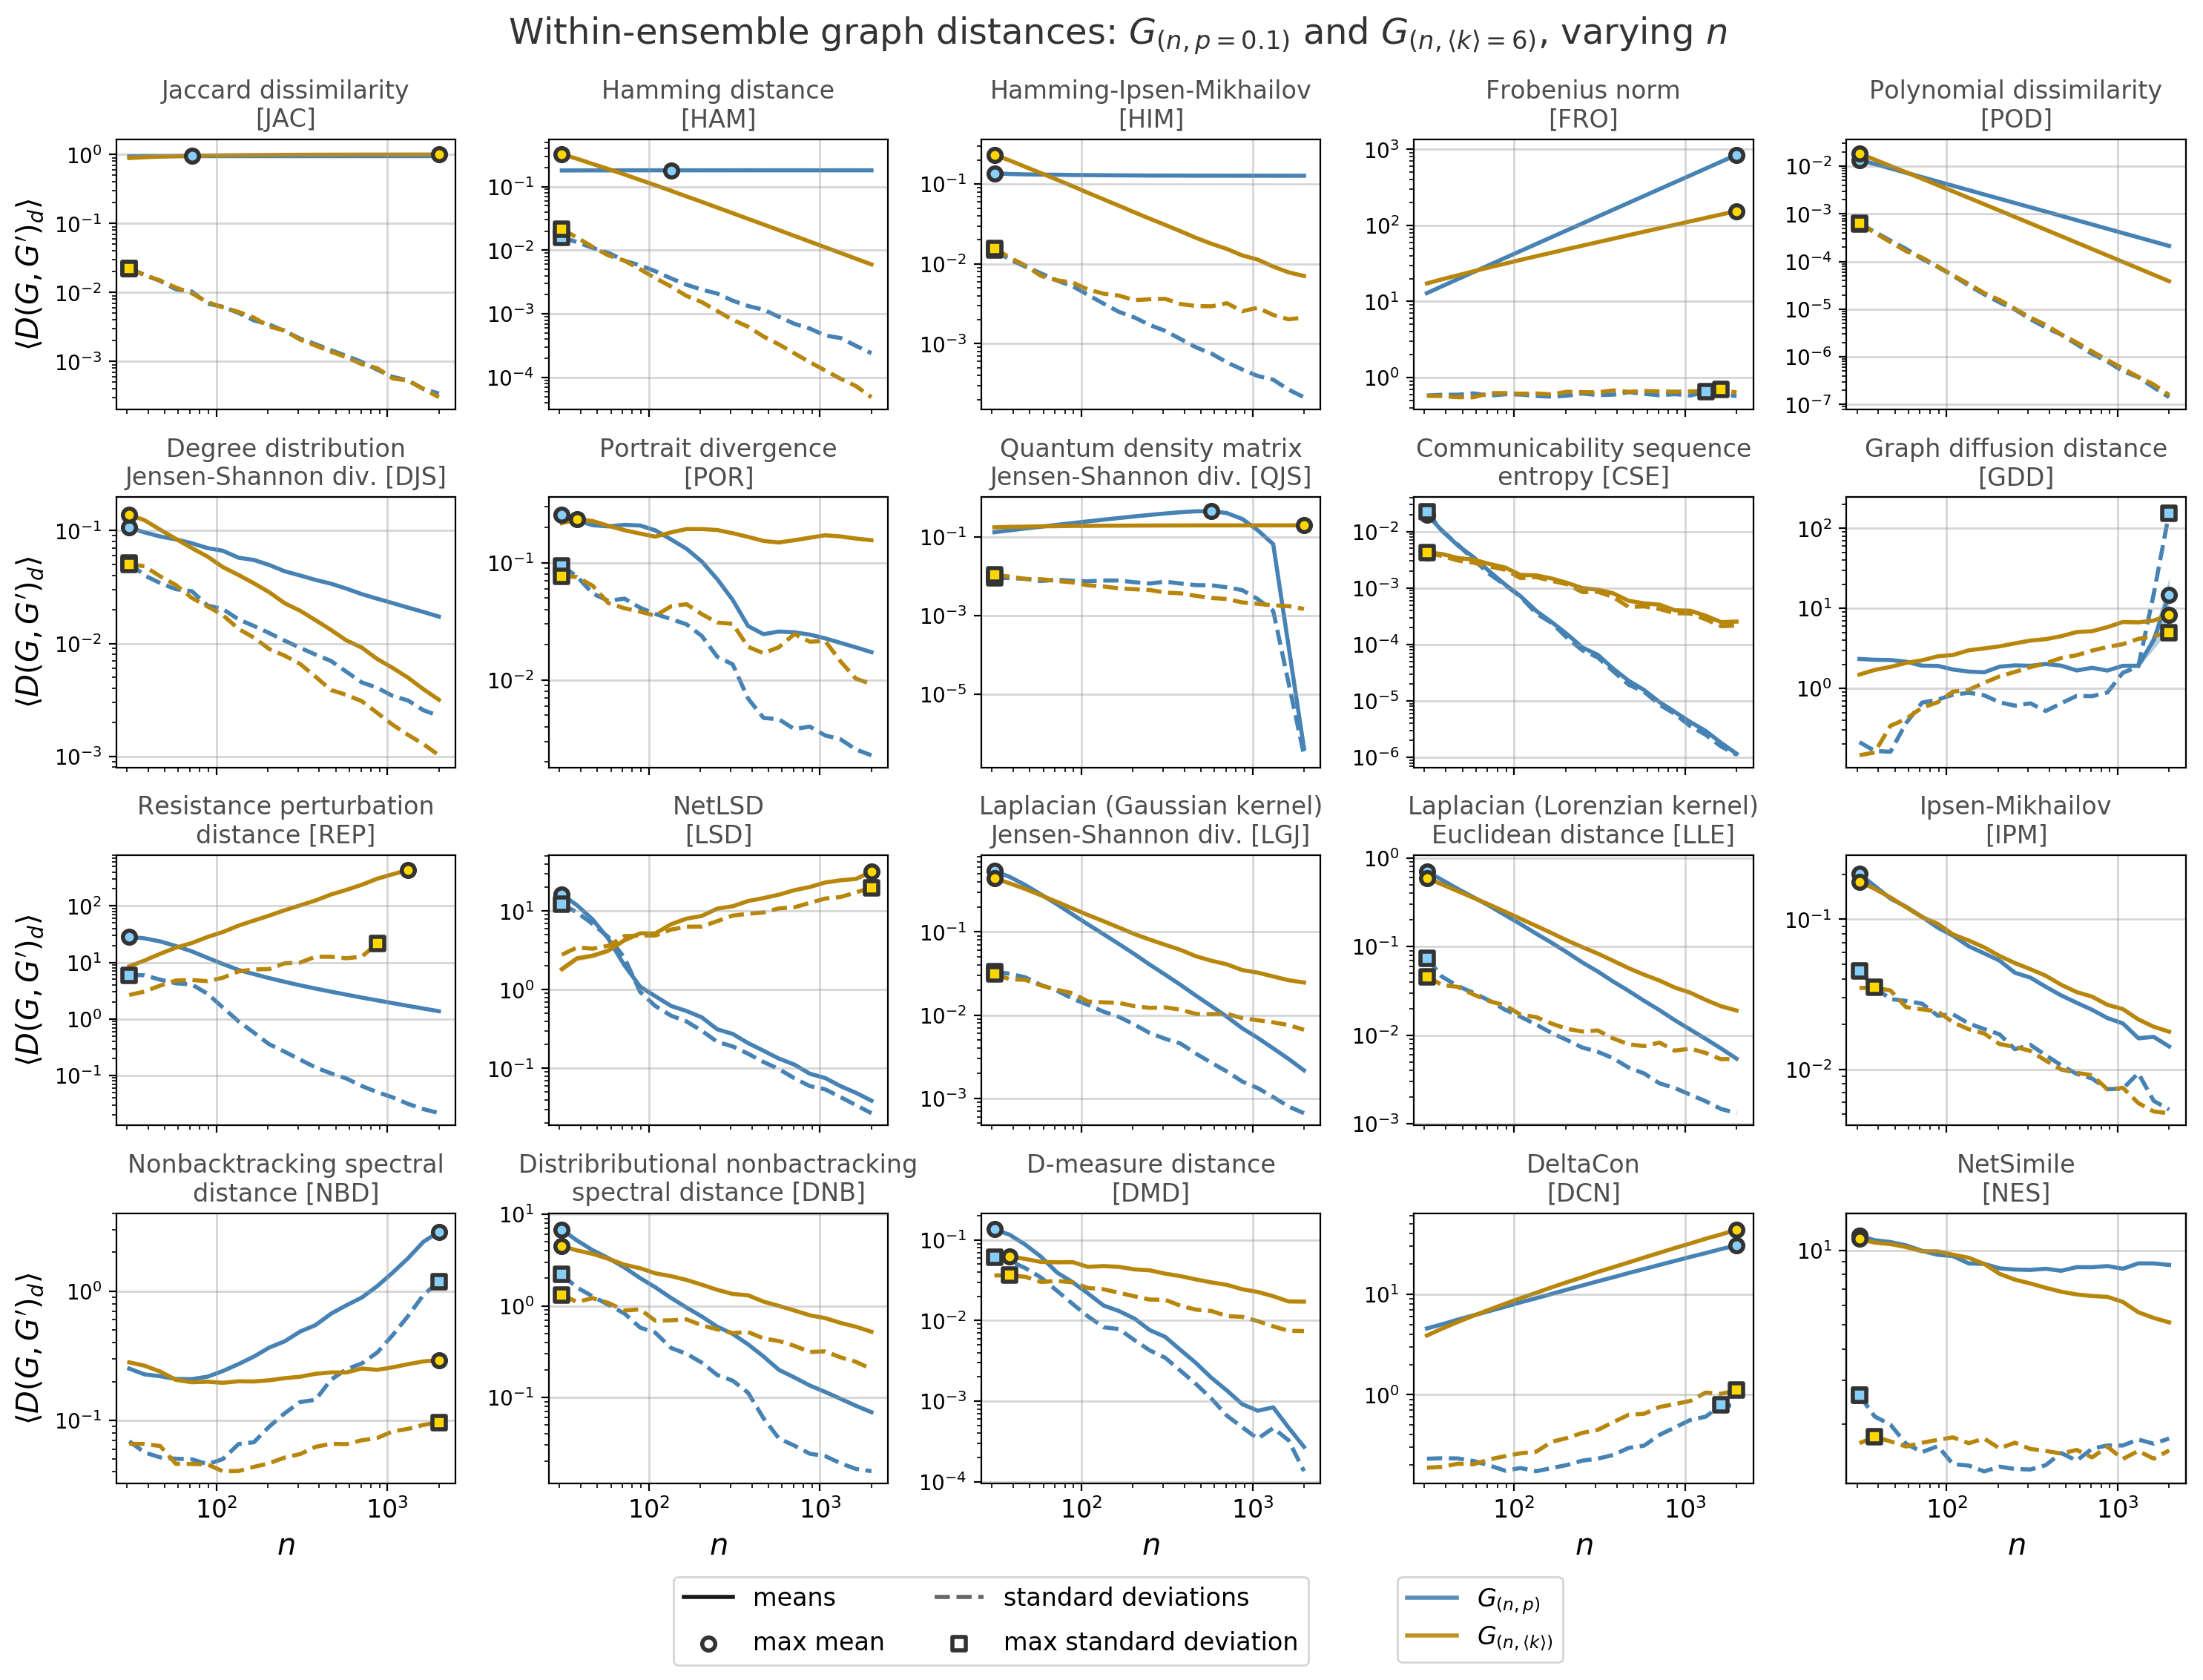

In [16]:
ncols = 5
nrows = 4
w = 3.6
h = 3.0

gnp_col = 'steelblue'
gnp_col_l = 'lightskyblue'
gnk_col = 'darkgoldenrod'
gnk_col_l = 'gold'

tups = list(it.product(range(nrows), range(ncols)))
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=200, sharex=True)

plt.subplots_adjust(wspace=0.275,hspace=0.325)
wid = 4
m = 1

for ai, tup in enumerate(tups):
    d_lab = all_distance_function_names[ai]
    df_i_gnp = wegdf.loc[(wegdf['distance_label']==d_lab)&(wegdf['ensemble']=='gnp')].copy()
    df_i_gnk = wegdf.loc[(wegdf['distance_label']==d_lab)&(wegdf['ensemble']=='gnk')].copy()
    
    xvals_i_gnp = df_i_gnp['param_value'].values
    xvals_i_gnk = df_i_gnk['param_value'].values
    means_i_gnp = df_i_gnp['d_mean'].values
    means_i_gnk = df_i_gnk['d_mean'].values
    stdvs_i_gnp = df_i_gnp['d_stdv'].values
    stdvs_i_gnk = df_i_gnk['d_stdv'].values
    max_i_mean_gnp = xvals_i_gnp[np.argmax(np.nan_to_num(means_i_gnp))]
    max_i_mean_gnk = xvals_i_gnk[np.argmax(np.nan_to_num(means_i_gnk))]
    max_i_stdv_gnp = xvals_i_gnp[np.argmax(np.nan_to_num(stdvs_i_gnp))]
    max_i_stdv_gnk = xvals_i_gnk[np.argmax(np.nan_to_num(stdvs_i_gnk))]
    
    nsamp_i_gnp = df_i_gnp['d_n'].values
    nsamp_i_gnk = df_i_gnk['d_n'].values
    low_st_gnp = means_i_gnp-stdvs_i_gnp/(nsamp_i_gnp**0.5)
    low_st_gnk = means_i_gnk-stdvs_i_gnk/(nsamp_i_gnk**0.5)
    upp_st_gnp = means_i_gnp+stdvs_i_gnp/(nsamp_i_gnp**0.5)
    upp_st_gnk = means_i_gnk+stdvs_i_gnk/(nsamp_i_gnk**0.5)
    
    ax[tup].plot(xvals_i_gnp, means_i_gnp, color=gnp_col, linewidth=2, zorder=0)
    ax[tup].fill_between(xvals_i_gnp, low_st_gnp, upp_st_gnp, color=gnp_col, zorder=0, alpha=0.4, linewidth=0)
    ax[tup].scatter([max_i_mean_gnp], [np.nanmax(means_i_gnp)], c=gnp_col_l,
                    edgecolors='.2', lw=2, s=40)
    ax[tup].plot(xvals_i_gnp, stdvs_i_gnp, color=gnp_col, linewidth=2, zorder=0, linestyle='--')
    ax[tup].scatter([max_i_stdv_gnp], [np.nanmax(stdvs_i_gnp)], c=gnp_col_l,
                    edgecolors='.2', lw=2, s=40, marker='s')

    ax[tup].plot(xvals_i_gnk, means_i_gnk, color=gnk_col, linewidth=2, zorder=0)
    ax[tup].fill_between(xvals_i_gnk, low_st_gnk, upp_st_gnk, color=gnk_col, zorder=0, alpha=0.4, linewidth=0)
    ax[tup].scatter([max_i_mean_gnk], [np.nanmax(means_i_gnk)], c=gnk_col_l,
                    edgecolors='.2', lw=2, s=40)
    ax[tup].plot(xvals_i_gnk, stdvs_i_gnk, color=gnk_col, linewidth=2, zorder=0, linestyle='--')
    ax[tup].scatter([max_i_stdv_gnk], [np.nanmax(stdvs_i_gnk)], c=gnk_col_l,
                    edgecolors='.2', lw=2, s=40, marker='s')

    ax[tup].set_title(title_dict[d_lab],fontsize='large',color='.3')
    ax[tup].grid(linewidth=1, color='.6', alpha=0.4)

    ax[tup].set_yscale('log')
    ax[tup].set_xscale('log')
    ylim_i = ax[tup].get_ylim()
    ydiff = ylim_i[1] - ylim_i[0]
    ylim_i = (ylim_i[0], ylim_i[1]+0.1*ydiff)
    ax[tup].set_ylim(ylim_i[0], ylim_i[1])
    ax[tup].set_xlim(2.6e1,2.5e3)

    if tup[0] == nrows-1:
        ax[tup].set_xlabel(r'$%s$'%param_label,fontsize='x-large')
        ax[tup].xaxis.set_tick_params(labelsize='large')
        if tup[1] == ncols-1:
            plotmean, = ax[tup].plot(xvals_i_gnp*100+1, means_i_gnp, color='.1',
                                     linewidth=2, zorder=0)
            maxm = ax[tup].scatter([max_i_mean_gnp], [np.nanmax(means_i_gnp)],
                                   c='w', edgecolors='.2', zorder=0, lw=2, s=40)
            plotstdv, = ax[tup].plot(xvals_i_gnp*100+1, stdvs_i_gnp, color='.4',
                                     linewidth=2, zorder=0, linestyle='--')
            maxs = ax[tup].scatter([max_i_stdv_gnp], [np.nanmax(stdvs_i_gnp)],
                                   c='w', edgecolors='.2', zorder=0, lw=2, s=40, marker='s')

            ax2 = ax[tup].twinx()
            ax2.plot(xvals_i_gnp*100, means_i_gnp, color=gnp_col, linewidth=2, zorder=0,
                     alpha=0.9, label=r'$G_{(n,p)}$')
            ax2.plot(xvals_i_gnk*100, means_i_gnk, color=gnk_col, linewidth=2, zorder=0,
                     alpha=0.9, label=r'$G_{(n,\langle k \rangle)}$')
            ax2.set_yticks([])

            legend2 = ax[tup].legend([plotmean, maxm, plotstdv, maxs],
                                     ['means', 'max mean', 'standard deviations', 'max standard deviation'],
                                     bbox_to_anchor=[-1.55,-0.3], ncol=2, fontsize='large', labelspacing=0.8)
            ax2.legend(bbox_to_anchor=[-0.8,-0.3], ncol=1, fontsize='large', labelspacing=0.35)

    if tup[1] == 0:
        ax[tup].set_ylabel(r"$\langle D(G, G')_d \rangle$",fontsize='x-large')

plt.suptitle('Within-ensemble graph distances: '+\
             r'$G_{(n,p=0.1)}$ and $G_{(n,\langle k \rangle = 6)}$, varying $n$',
             fontsize='xx-large', y=0.95, color='.2')

plt.savefig('../figs/pngs/%s_wegd_%s.png'%('gnp_gnk',param_label),bbox_inches='tight',dpi=425)
plt.savefig('../figs/pdfs/%s_wegd_%s.pdf'%('gnp_gnk',param_label),bbox_inches='tight')

plt.show()